# Supervised Machine Learning on Disease Prediction

Task Highlights :


> Perform data visualization

> Make use of different algorithms to predict target label

> Show 3 different algorithms' accuracies with the help of graphs

The main problems to be solved by this data science task have been properly framed, in terms of client's goals, background information, and purpose of task. This ensures that the task is understood and explored to better inform the decision-making process on the possible range of approaches and solutions to the problems.

This task will extract relevant, representative, and sufficient case study data from a reputable and reliable online source. Appropriate preprocessing adjustments and data exploration will be performed on the data to ensure reliable and reasonable outcomes and outputs. For the data mining and modelling process, the popular classifier models of Decision Tree, Random Forest, and Multilayer Perceptron Neural Network will be fitted, analysed, and evaluated in terms of the performance metrics of accuracy, precision, recall, and F1-score in predicting the classifications of disease. All significant interpretations and observations will be noted and considered for future improvements. 

Following the purpose of this task, the primary focus will be on disease-related factors, which are a range of symptoms represented as 0 for absence and 1 for presence. Analysing these will help to identify concern areas and predict the disease prognosis.

#### Note that throughout this task, the important points are differentiated using the Indented Quotes format.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [15]:
# import data from Excel csv sheet
dftrain = pd.read_csv('Training.csv')
dftest = pd.read_csv('Testing.csv')

# show first 5 records of training dataset
print('Shape: {}'.format(dftrain.shape))
dftrain.head()

Shape: (4920, 134)


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [16]:
# show first 5 records of test dataset
print('Shape: {}'.format(dftest.shape))
dftest.head()

Shape: (42, 133)


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [17]:
# return the object type, which is dataframe
print(type(dftrain), type(dftest))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


The dataframe format type will facilitate the use of a wider variety of syntax and methods for data analysis, including describe() and info().

Regarding the attributes included in Disease Prediction dataset, there are 132 different disease symptoms, the first 3 recorded being 'itching', 'skin rash', and 'nodal skin eruptions'. The target class label is 'prognosis'.

# Data Preprocessing

Data preprocessing is a data mining technique that transforms raw data into an understandable format. This process has four main stages – data cleaning, data integration, data transformation, and data reduction.

Data cleaning will filter, detect, and handle dirty data to ensure quality data and quality analysis results. In this case, there may be noises of impossible and extreme values and outliers, and missing values. The errors may include inconsistent data and redundant attributes and data.

As the first step, null values within the dataset will be identified, and appropriately replaced if possible.

In [18]:
# display the number of entries, the number and names of the column attributes, the data type and
    # digit placings, and the memory space used
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


The dataset contains 4920 rows of records and 134 columns of attributes. The data types of the attributes consist of 1 qualitative discrete categorical, 132 quantitative discrete binary, and 1 quantitative continuous numerical float with 64 digit placings.

The memory space usage is at least 5 megabytes (MB).

In [19]:
# identify null values
null_columns = dftrain.columns[dftrain.isnull().any()]
dftrain[null_columns].isnull().sum()

Unnamed: 133    4920
dtype: int64

'Unnamed: 133' is noticed to have all null values. It is dropped as it is a redundant attribute with missing values for all records.

In [20]:
# drop 'Unnamed: 133'
dftrain.drop('Unnamed: 133', axis=1, inplace=True)
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


Through this, it is found that there are no other null values present in the training dataset. 

In [21]:
# display the number of entries, the number and names of the column attributes, the data type and
    # digit placings, and the memory space used
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


The dataset contains 42 rows of records and 133 columns of attributes. The data types of the attributes consist of 1 qualitative discrete categorical, and 132 quantitative discrete binary.

The memory space usage is at least 43.8 kilobytes (KB).

In [22]:
# identify null values
null_columns=dftest.columns[dftest.isnull().any()]
dftest[null_columns].isnull().sum()

Series([], dtype: float64)

Through this, it is found that there are no null values present in the test dataset.

Next, errors of inconsistent data such as not comparable numerical measurement formats and data types are checked by analysing the bar plots.

C:\Users\Tanamay\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


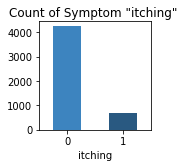

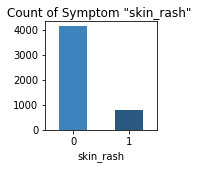

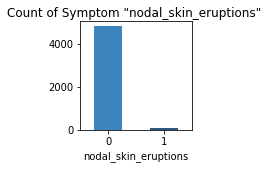

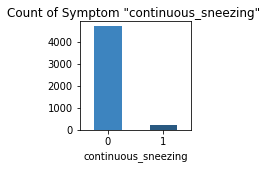

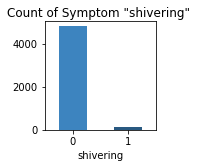

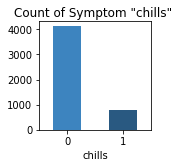

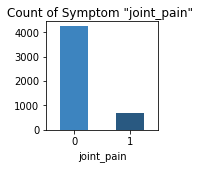

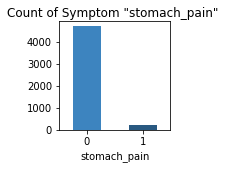

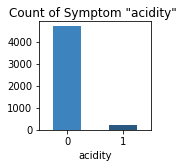

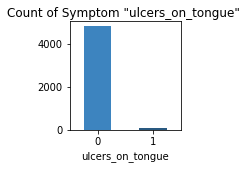

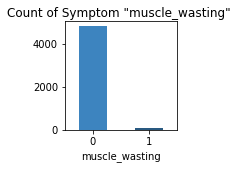

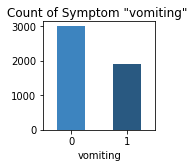

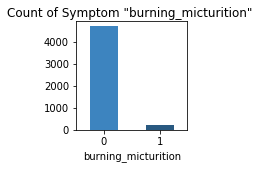

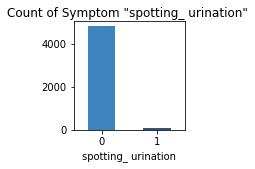

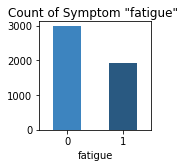

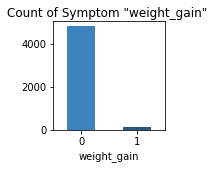

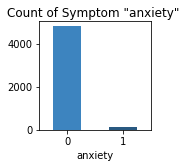

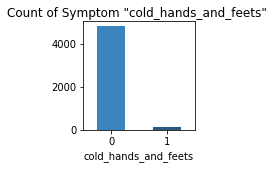

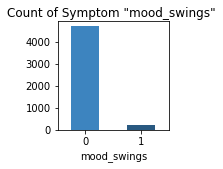

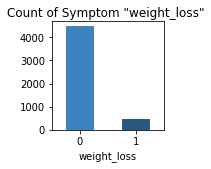

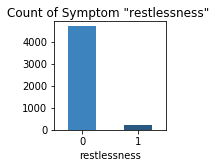

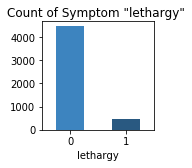

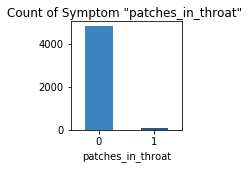

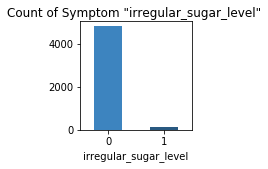

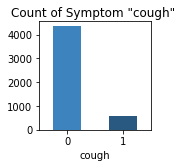

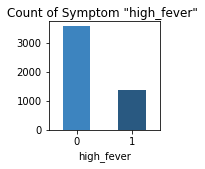

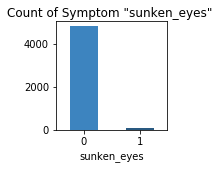

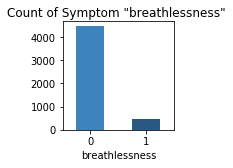

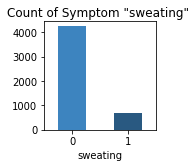

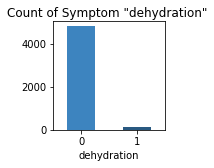

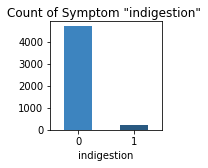

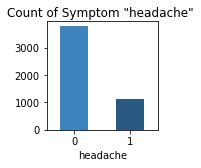

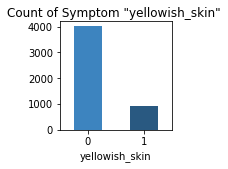

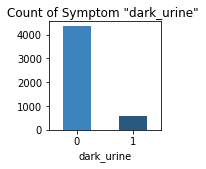

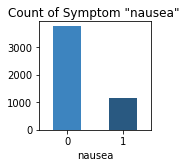

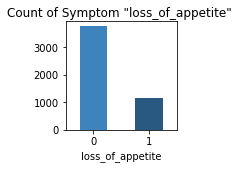

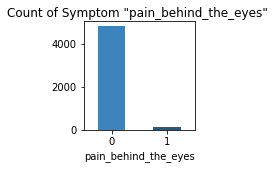

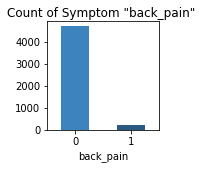

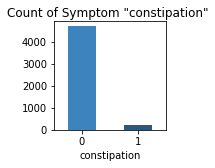

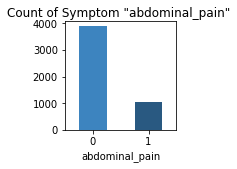

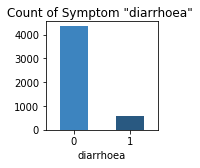

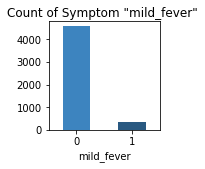

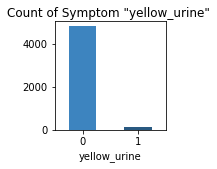

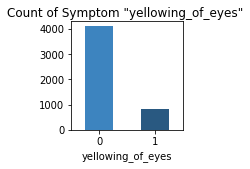

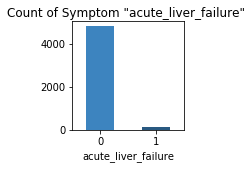

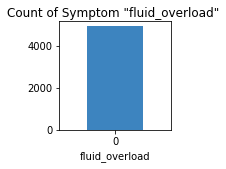

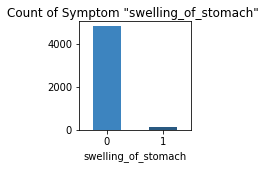

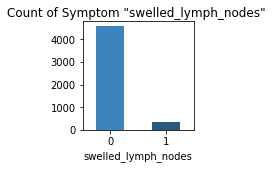

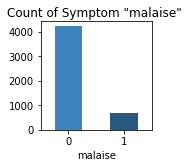

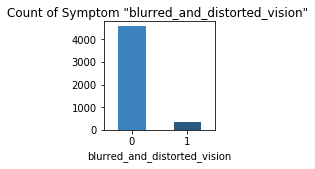

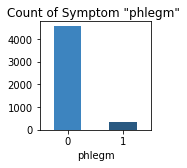

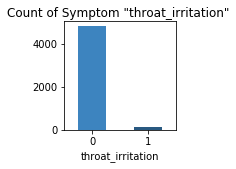

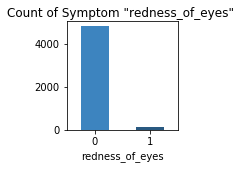

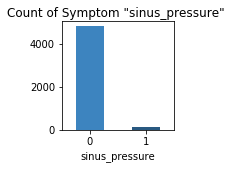

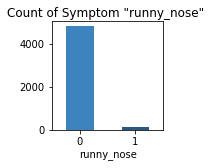

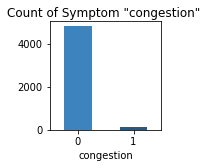

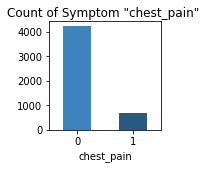

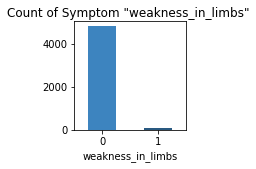

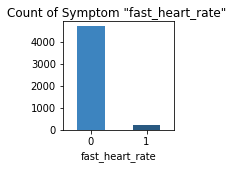

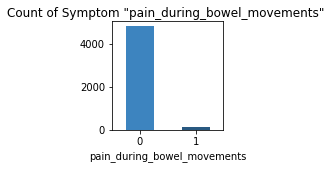

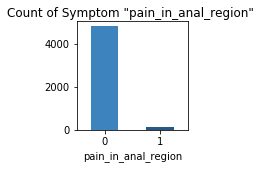

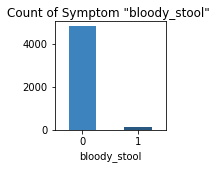

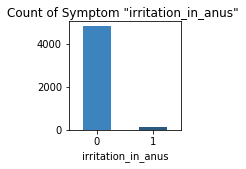

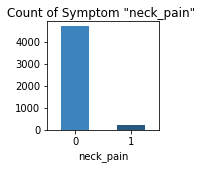

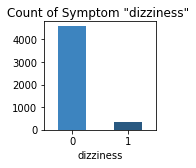

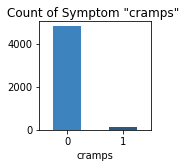

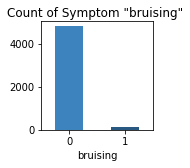

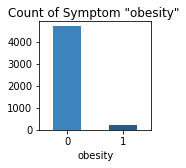

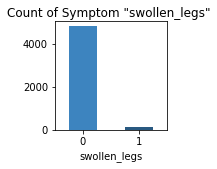

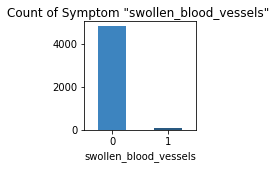

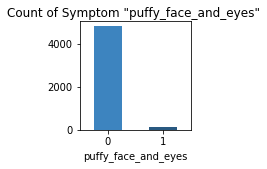

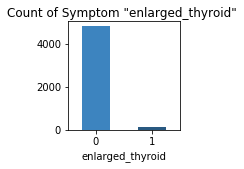

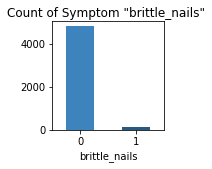

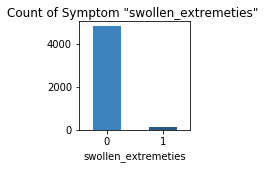

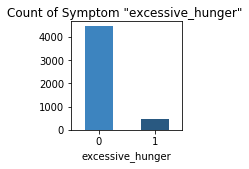

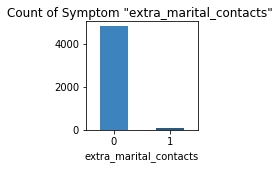

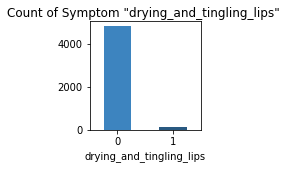

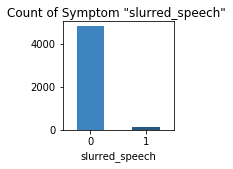

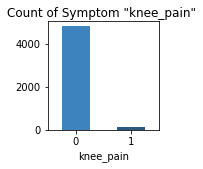

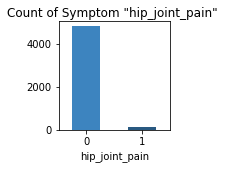

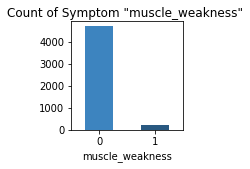

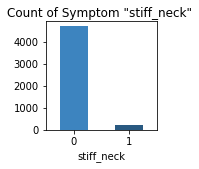

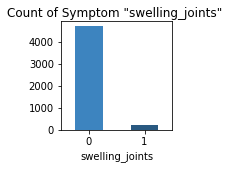

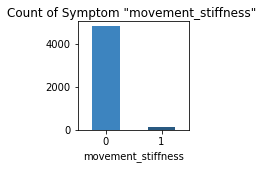

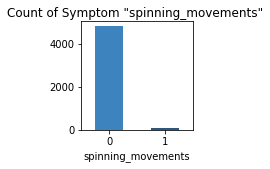

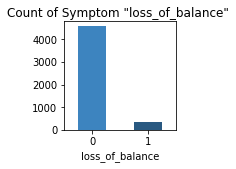

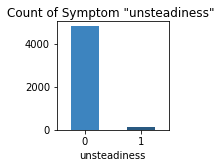

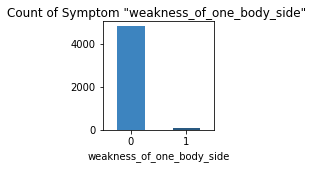

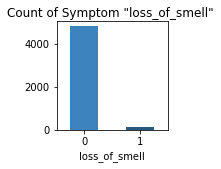

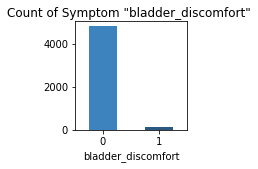

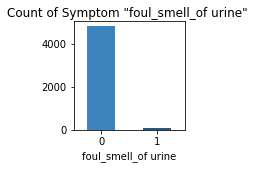

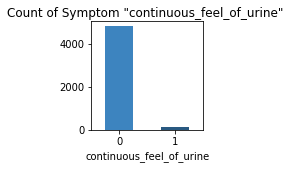

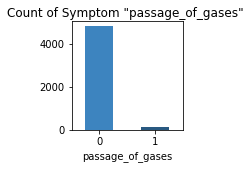

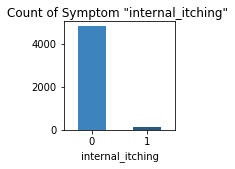

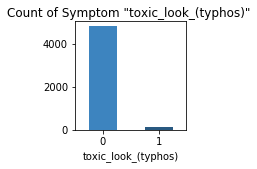

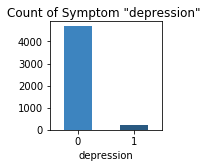

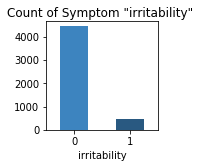

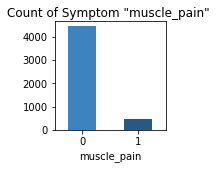

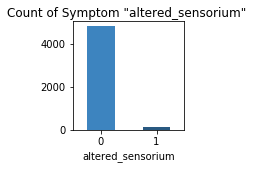

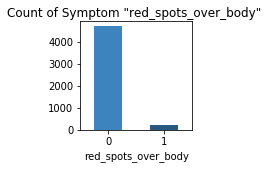

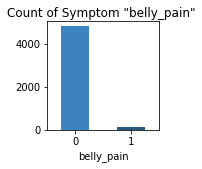

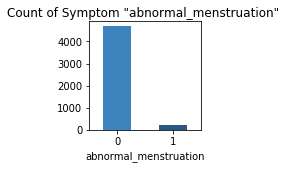

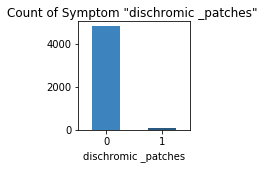

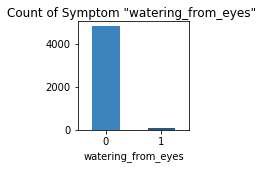

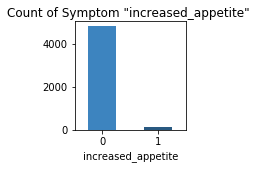

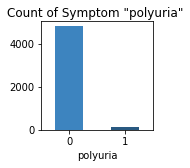

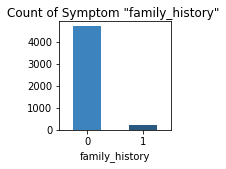

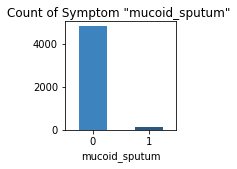

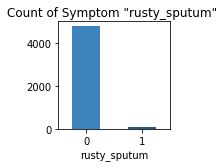

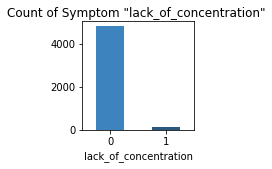

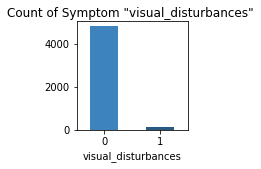

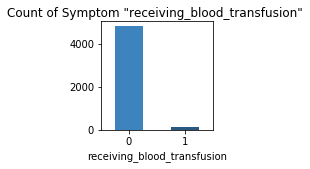

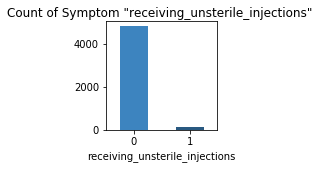

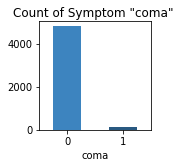

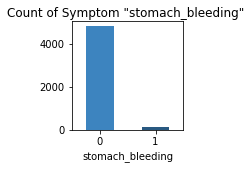

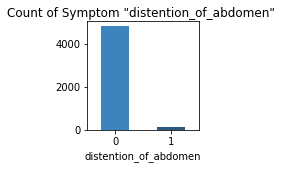

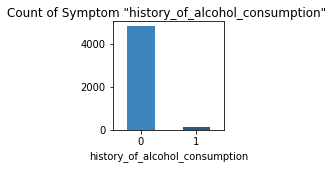

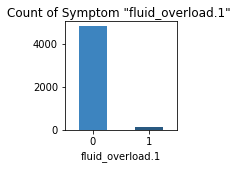

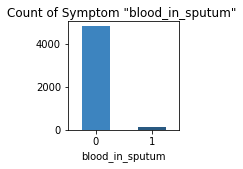

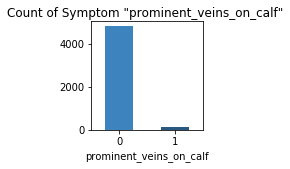

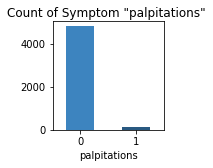

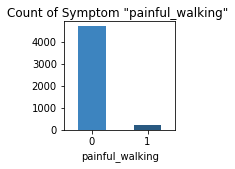

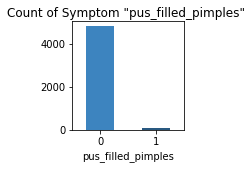

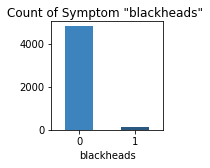

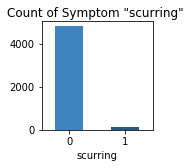

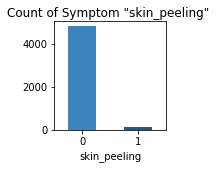

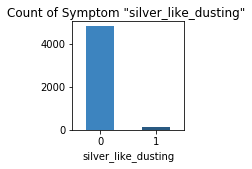

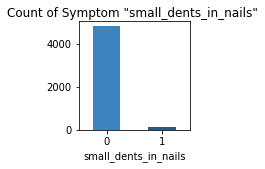

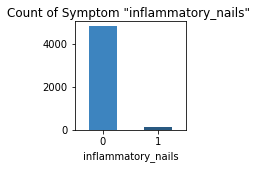

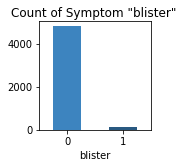

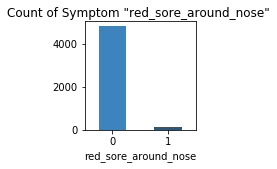

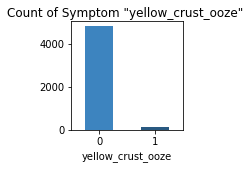

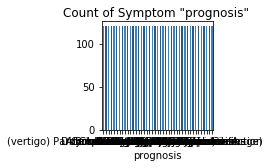

In [23]:
colors = ['#3d84bf', '#295981']
columns = list(dftrain.columns)
# barplot of the count for all symptoms' absence and presence
for i in columns :
    fig, ax = plt.subplots(figsize=(2,2))
    bar = dftrain.groupby(i).size().plot(kind='bar', color=colors, ax=ax)
    plt.xticks(rotation=0)
    fig.suptitle("Count of Symptom \"" + i + "\"")

C:\Users\Tanamay\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


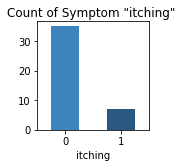

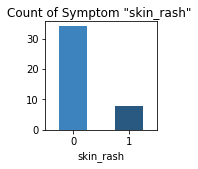

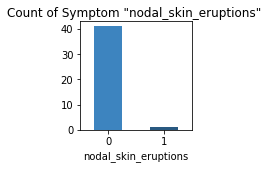

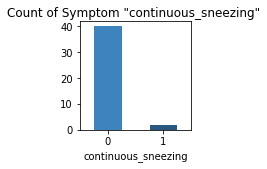

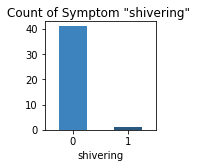

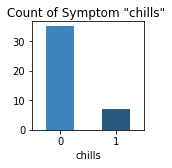

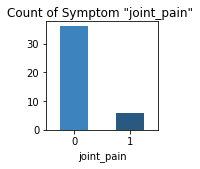

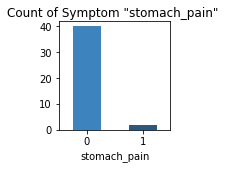

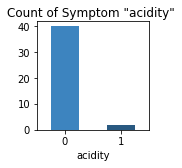

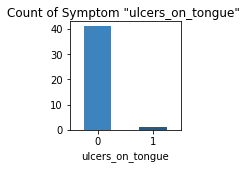

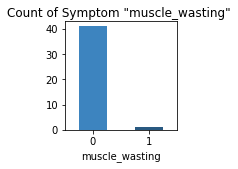

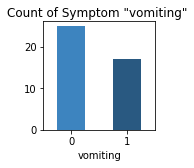

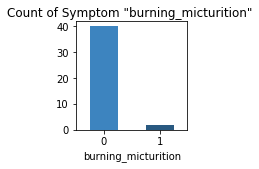

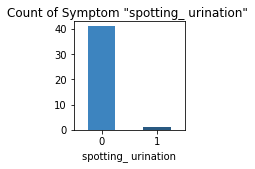

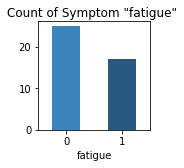

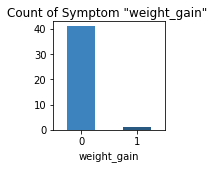

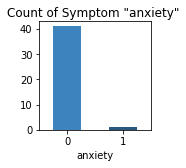

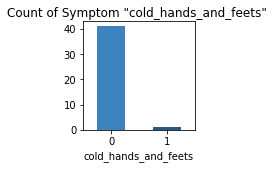

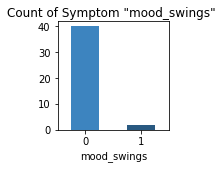

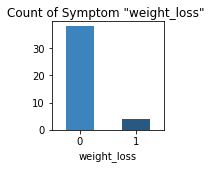

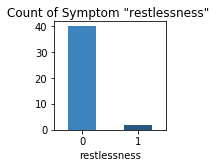

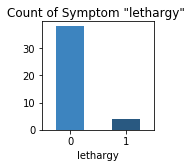

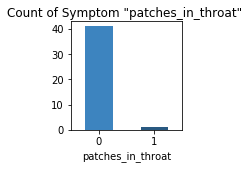

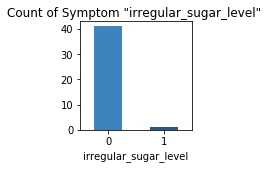

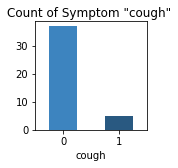

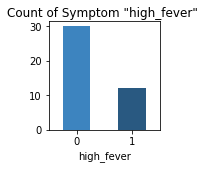

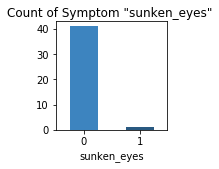

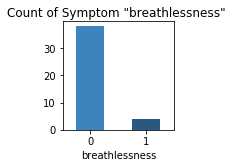

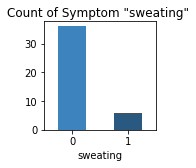

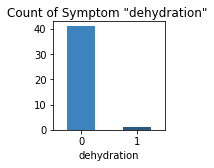

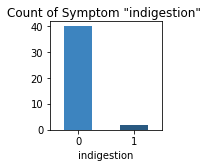

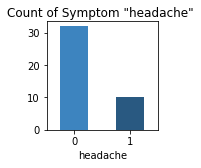

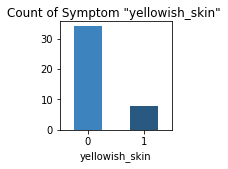

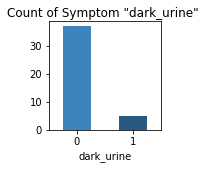

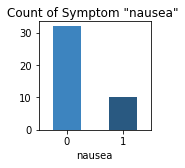

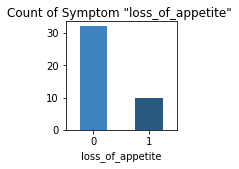

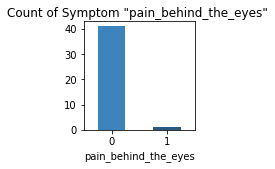

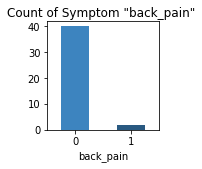

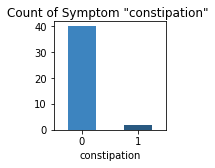

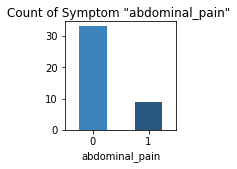

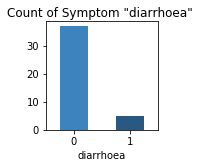

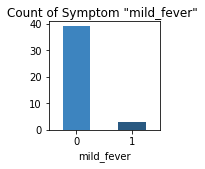

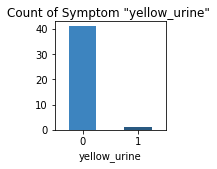

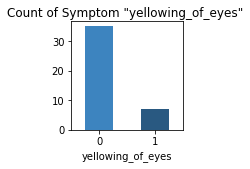

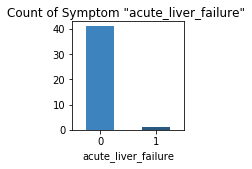

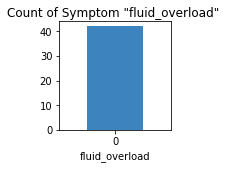

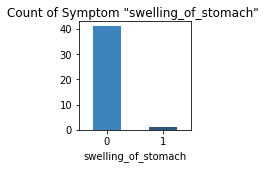

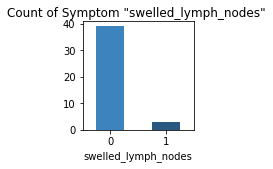

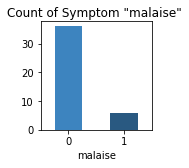

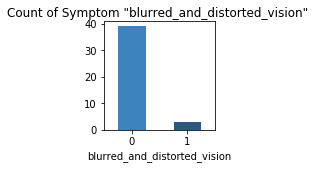

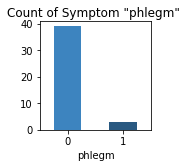

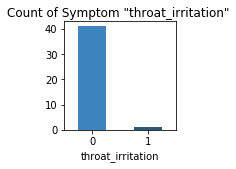

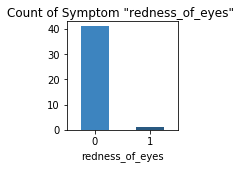

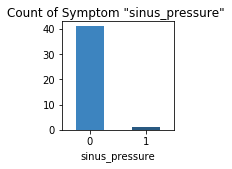

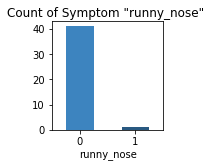

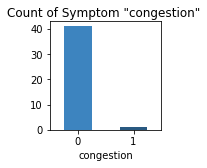

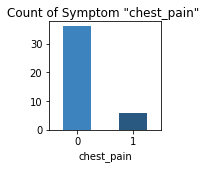

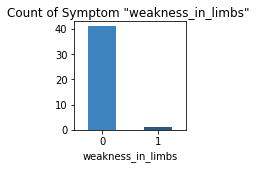

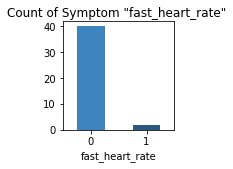

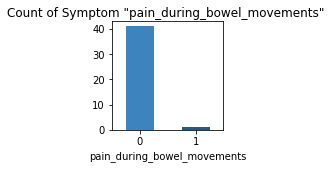

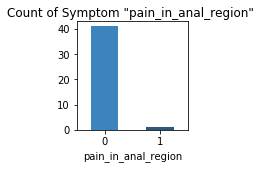

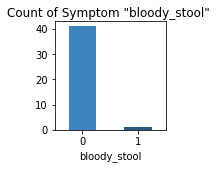

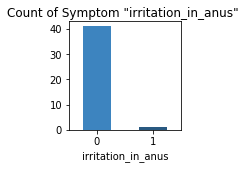

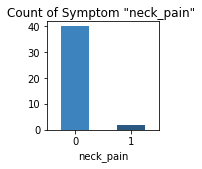

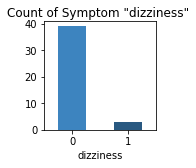

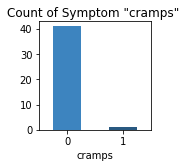

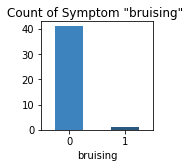

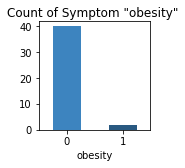

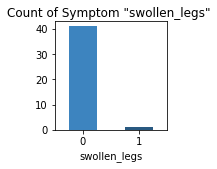

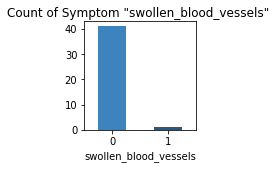

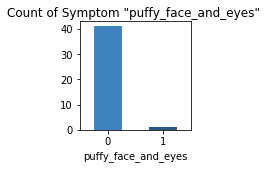

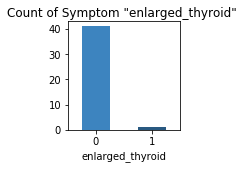

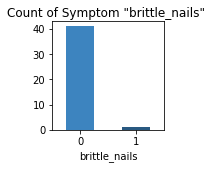

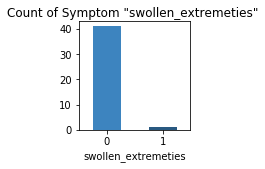

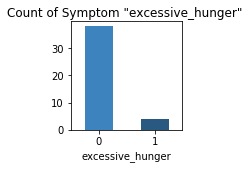

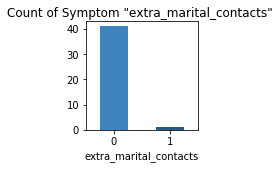

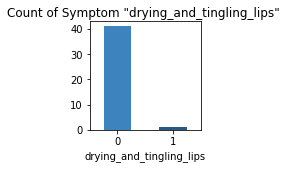

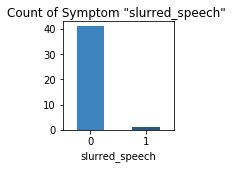

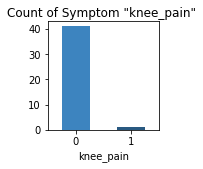

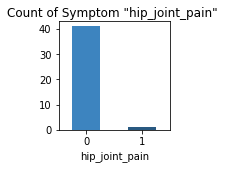

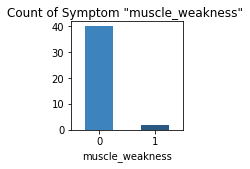

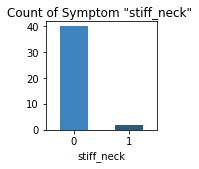

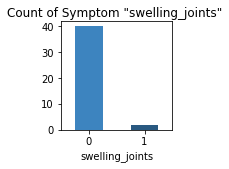

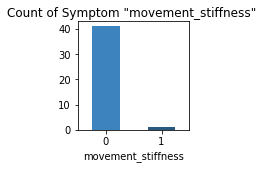

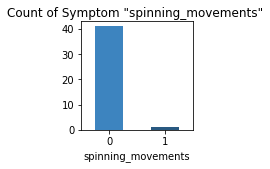

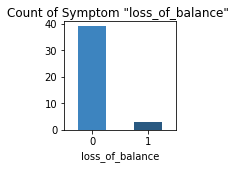

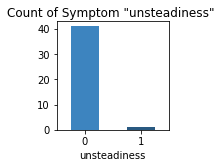

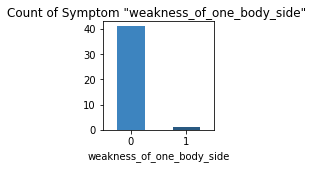

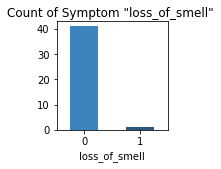

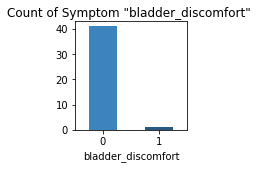

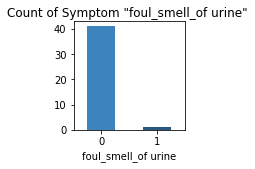

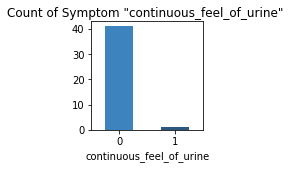

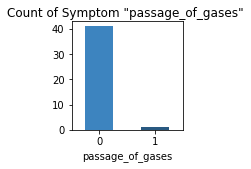

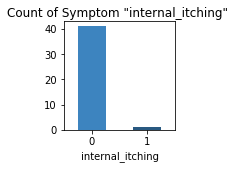

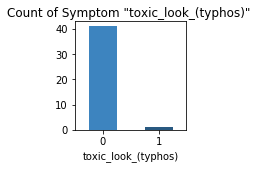

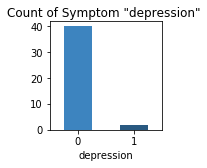

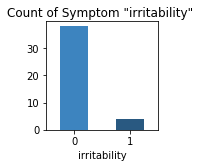

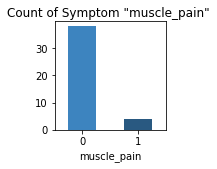

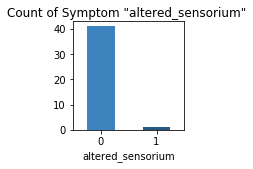

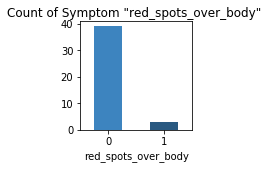

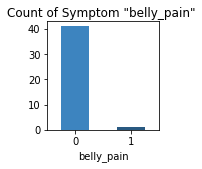

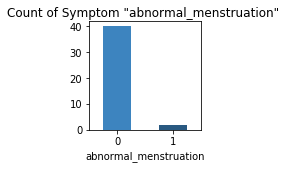

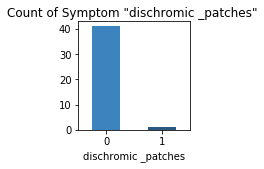

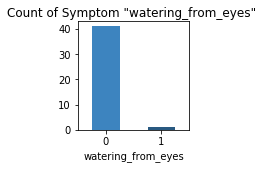

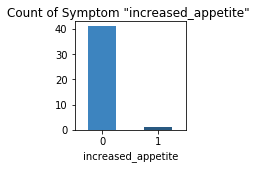

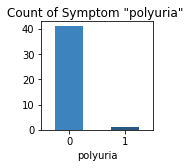

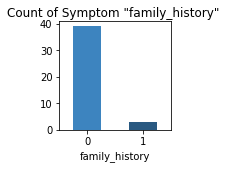

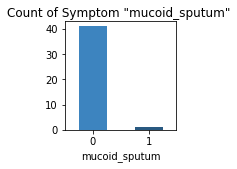

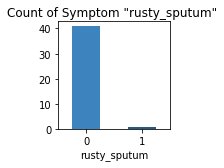

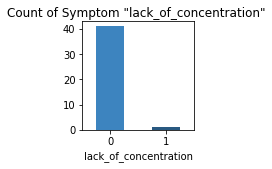

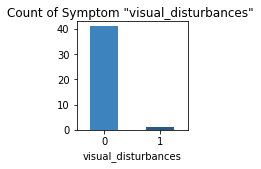

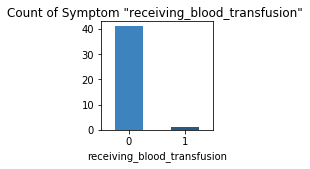

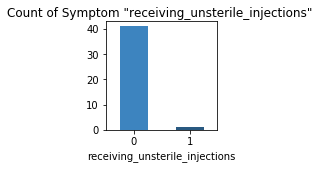

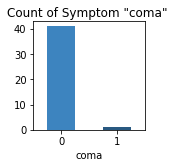

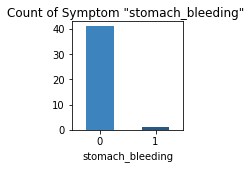

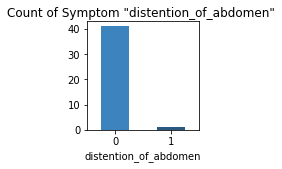

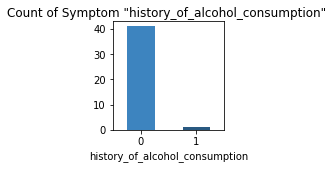

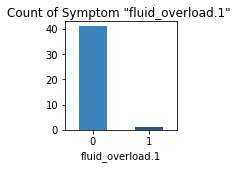

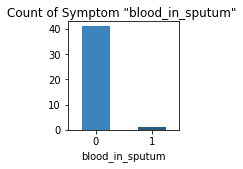

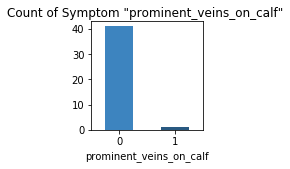

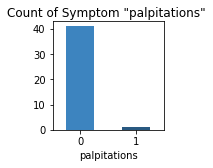

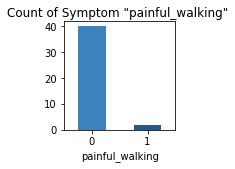

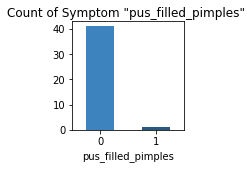

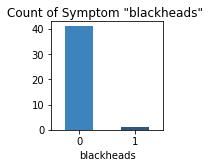

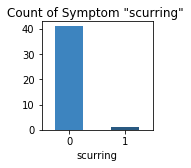

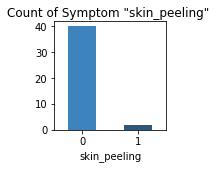

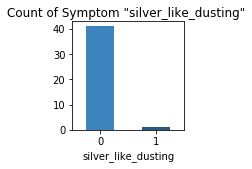

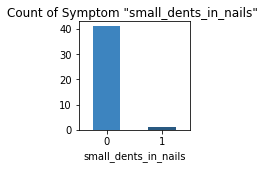

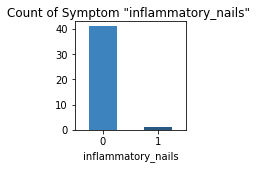

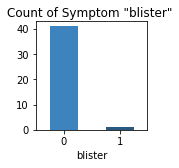

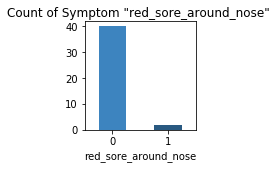

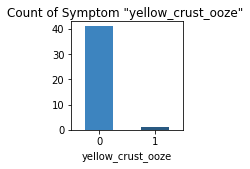

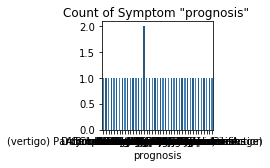

In [24]:
colors = ['#3d84bf', '#295981']
# barplot of the count for all symptoms' absence and presence
for i in columns :
    fig, ax = plt.subplots(figsize=(2,2))
    bar = dftest.groupby(i).size().plot(kind='bar', color=colors, ax=ax)
    plt.xticks(rotation=0)
    fig.suptitle("Count of Symptom \"" + i + "\"")

Through this, it is found that there are no noises of impossible values or errors of inconsistent values. All predictors have boolean values.

For the next step, unique() is used to check qualitative data for noises of impossible values such as incorrect mispelt data entries.

In [25]:
# all symptoms, sorted alphabetically
sorted(dftrain.prognosis.unique())

['(vertigo) Paroymsal  Positional Vertigo',
 'AIDS',
 'Acne',
 'Alcoholic hepatitis',
 'Allergy',
 'Arthritis',
 'Bronchial Asthma',
 'Cervical spondylosis',
 'Chicken pox',
 'Chronic cholestasis',
 'Common Cold',
 'Dengue',
 'Diabetes ',
 'Dimorphic hemmorhoids(piles)',
 'Drug Reaction',
 'Fungal infection',
 'GERD',
 'Gastroenteritis',
 'Heart attack',
 'Hepatitis B',
 'Hepatitis C',
 'Hepatitis D',
 'Hepatitis E',
 'Hypertension ',
 'Hyperthyroidism',
 'Hypoglycemia',
 'Hypothyroidism',
 'Impetigo',
 'Jaundice',
 'Malaria',
 'Migraine',
 'Osteoarthristis',
 'Paralysis (brain hemorrhage)',
 'Peptic ulcer diseae',
 'Pneumonia',
 'Psoriasis',
 'Tuberculosis',
 'Typhoid',
 'Urinary tract infection',
 'Varicose veins',
 'hepatitis A']

Through this, it is found that there are no noises of impossible values or errors of inconsistent values.

The Winsorisation method is popularly chosen to handle numerical outliers, where outlier values are replaced with the minimum or maximum non-outlier value identified using the interquartile range (IQR) method. The acceptable value range to not be considered an outlier is [Q1-1.5IQR, Q3+1.5IQR], where Q1 is the first quartile of 25 percentile, Q3 is the third quartile of 75 percentile, and IQR is (Q3 – Q1).

In addition, impossible and extreme numerical values can be assumed as incorrect data entries, where they are identified as differing from the mean attribute value by a comparatively large margin.

In this case, no values were considered as outliers or impossible and extreme values, since all numerical values are reasonable and within an expected range in relation to the Disease Prediction's absence or present case study.

Duplicated rows or records will not be dropped from the training dataset in this case. There is no certain redundancy which causes inaccurate results and outcomes, since the training dataset has no unique identfier that denotes separate entities. Despite this, the test dataset will still be checked for duplicated rows.

In [26]:
# detect duplicated records
dftest[dftest.duplicated(subset = None, keep = False)]

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis


There are no duplications in the test dataset.

Data integration is not needed, since only one dataset is used for training and testing each with no schema integrations, and thus no discernable entity identification issues or data value conflicts.

Data transformation will check overall range of values for the entire dataset. All values should fall under an acceptable small range to allow easy visualisations and modelling. It is found that all values already fall under a small range of [0, 1], specifically either 0 or 1 or also known as boolean, so there is no need for data transformation to scale the values into a comparable range for easy visualisations and modelling.

Data reduction may involve dropping redundant attributes through attribute dimensionality reduction. However, there are no related cases detected thus far.

A correlation heatmap is used to list all the correlation coefficients in order to identify multicollinearity, in other words high intercorrelation above an absolute value of 0.5 between the a pair of attributes. For a pair of attributes with multicollinearity, one of them will be dropped since it would be redudant to include both of them with almost mirroring values and thus almost perfect descriptions of each other. Another reason is to prevent overfitting.

The correlation will compare and describe the linear connection and relationship between pairs of features, through the type of correlation and its strength. A positive correlation indicates that both features will change their values in the same direction, while a negative correlation indicates that both will change in opposite directions. The larger the correlation strength, the stronger the connection and relationship.

However, Decision Tree, Random Forest, and Multilayer Perceptron Neural Network models are chosen as most appropriate classification models, and they are all immune to multicollinearity. As all are non-parametric models, Decision Tree in particular only examines one of the features at a time during the splitting process. Similarly, Neural Networks tend to be overparameterized while also having a parallel nature. For Random Forests, each tree only considers a subset of all the features, which reduces the feature space that each tree is optimizing over and thus combats the effects of multicollinearity. Due to these reasons and in the case of this Disease Prediction task where all predictors have boolean values, no attributes were removed as to not lose relevant information and degrade the overall process of EDA and supervised machine learning prediction.

The final dataset information is summarised below.

In [27]:
# display the number of entries, the number and names of the column attributes, the data type and
    # digit placings, and the memory space used
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [28]:
# display the number of entries, the number and names of the column attributes, the data type and
    # digit placings, and the memory space used
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


The training dataset contains 4920 rows of records and 133 columns of attributes. The data types of the attributes consist of 1 qualitative discrete categorical, and 132 quantitative discrete binary. The memory space usage is at least 5 MBs.

The test dataset contains 42 rows of records and 133 columns of attributes. The data types of the attributes consist of 1 qualitative discrete categorical, and 132 quantitative discrete binary. The memory space usage is at least 43.8 KBs.

Data pre-processing is now complete.

# Exploratory Data Analysis (EDA)

EDA aims to perform initial investigations on data before formal modeling and graphical representations and visualisations, in order to discover patterns, look over assumptions, and test hypothesis. The summarised information on main characteristics and hidden trends in data can help the doctor to identify concern areas and problems, and the resolution of these can boost their accuracy in diagosing diseases.

Taking a closer look at the target class labels, as well as their frequency of occurences :

In [29]:
# list and count the target class label names and their frequency
from collections import Counter
count = Counter(dftrain['prognosis'])
count.items()

dict_items([('Fungal infection', 120), ('Allergy', 120), ('GERD', 120), ('Chronic cholestasis', 120), ('Drug Reaction', 120), ('Peptic ulcer diseae', 120), ('AIDS', 120), ('Diabetes ', 120), ('Gastroenteritis', 120), ('Bronchial Asthma', 120), ('Hypertension ', 120), ('Migraine', 120), ('Cervical spondylosis', 120), ('Paralysis (brain hemorrhage)', 120), ('Jaundice', 120), ('Malaria', 120), ('Chicken pox', 120), ('Dengue', 120), ('Typhoid', 120), ('hepatitis A', 120), ('Hepatitis B', 120), ('Hepatitis C', 120), ('Hepatitis D', 120), ('Hepatitis E', 120), ('Alcoholic hepatitis', 120), ('Tuberculosis', 120), ('Common Cold', 120), ('Pneumonia', 120), ('Dimorphic hemmorhoids(piles)', 120), ('Heart attack', 120), ('Varicose veins', 120), ('Hypothyroidism', 120), ('Hyperthyroidism', 120), ('Hypoglycemia', 120), ('Osteoarthristis', 120), ('Arthritis', 120), ('(vertigo) Paroymsal  Positional Vertigo', 120), ('Acne', 120), ('Urinary tract infection', 120), ('Psoriasis', 120), ('Impetigo', 120)]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


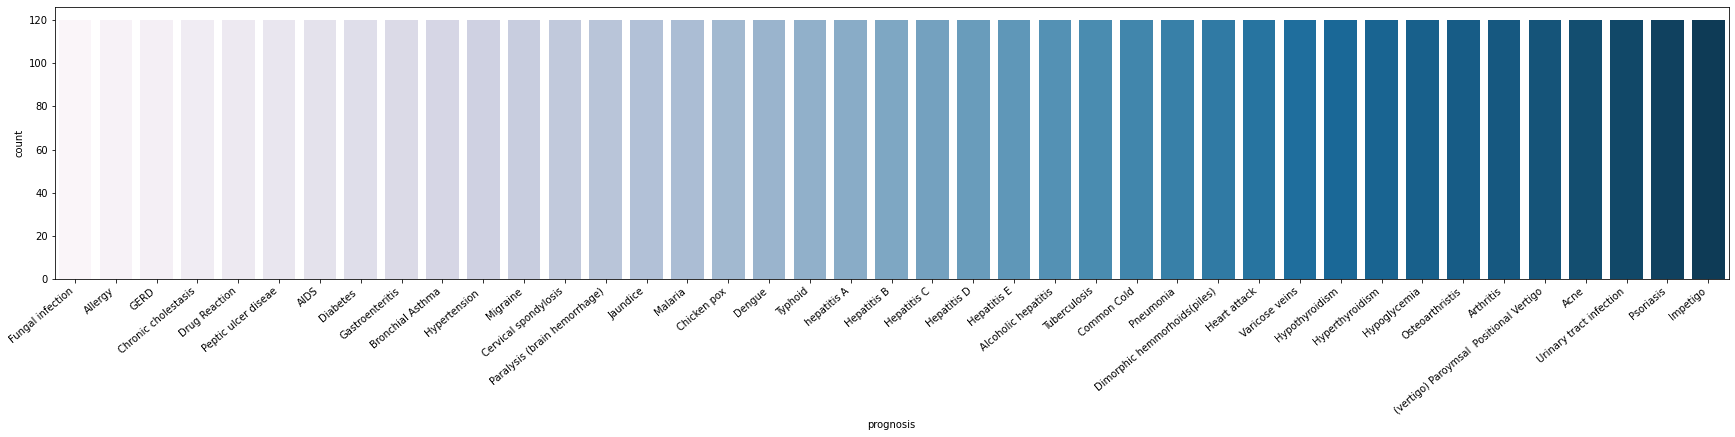

In [18]:
import seaborn as sns
# count of each target class label
plt.figure(figsize = (30, 5))
ax = sns.countplot(dftrain['prognosis'], palette = 'PuBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.show()

In [19]:
# list and count the target class label names and their frequency
count = Counter(dftest['prognosis'])
count.items()

dict_items([('Fungal infection', 2), ('Allergy', 1), ('GERD', 1), ('Chronic cholestasis', 1), ('Drug Reaction', 1), ('Peptic ulcer diseae', 1), ('AIDS', 1), ('Diabetes ', 1), ('Gastroenteritis', 1), ('Bronchial Asthma', 1), ('Hypertension ', 1), ('Migraine', 1), ('Cervical spondylosis', 1), ('Paralysis (brain hemorrhage)', 1), ('Jaundice', 1), ('Malaria', 1), ('Chicken pox', 1), ('Dengue', 1), ('Typhoid', 1), ('hepatitis A', 1), ('Hepatitis B', 1), ('Hepatitis C', 1), ('Hepatitis D', 1), ('Hepatitis E', 1), ('Alcoholic hepatitis', 1), ('Tuberculosis', 1), ('Common Cold', 1), ('Pneumonia', 1), ('Dimorphic hemmorhoids(piles)', 1), ('Heart attack', 1), ('Varicose veins', 1), ('Hypothyroidism', 1), ('Hyperthyroidism', 1), ('Hypoglycemia', 1), ('Osteoarthristis', 1), ('Arthritis', 1), ('(vertigo) Paroymsal  Positional Vertigo', 1), ('Acne', 1), ('Urinary tract infection', 1), ('Psoriasis', 1), ('Impetigo', 1)])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


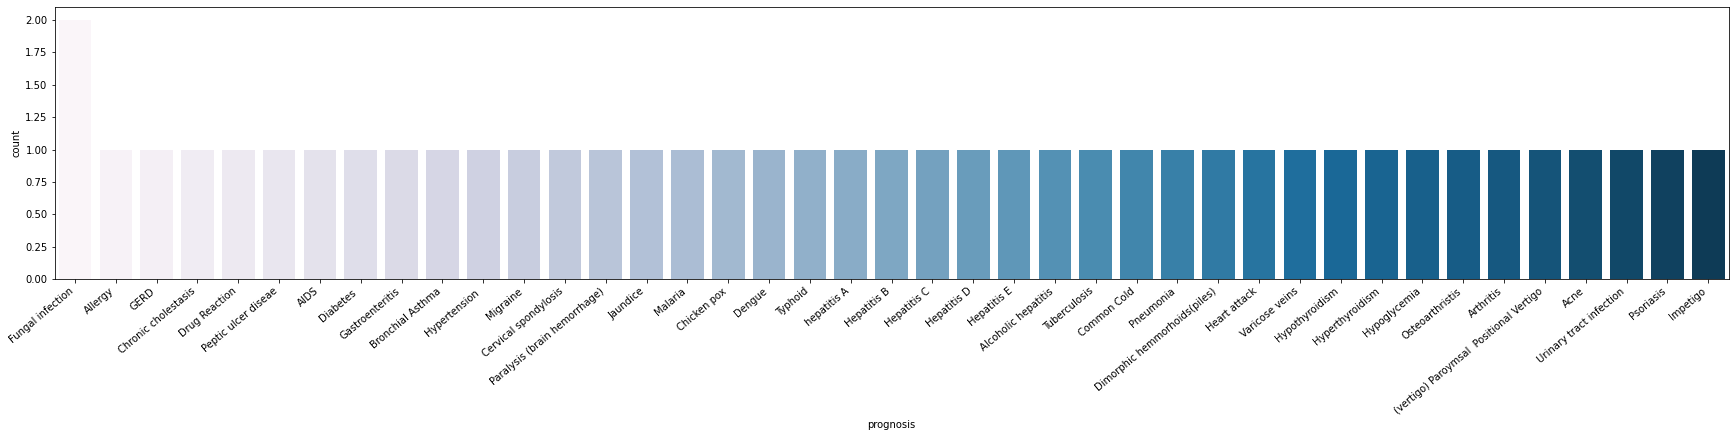

In [20]:
# count of each target class label
plt.figure(figsize = (30, 5))
ax = sns.countplot(dftest['prognosis'], palette = 'PuBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.show()

This clearly illustrates that data available for most target labels are proportionate, which will be taken note of for further data visualisations and analysis later on.

Moving on to analyse the individual qualitative attributes of the 132 symptoms : 

In [21]:
# list of all symptoms
columns = list(dftrain.columns)
columns

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',


Next, a closer look at the individual diagnosis of each symptom will identify the frequency of occurence of its absence or presence.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


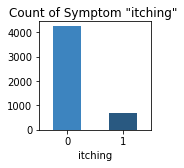

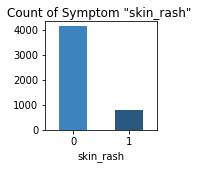

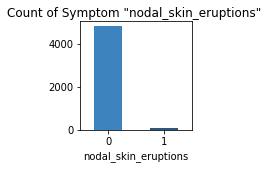

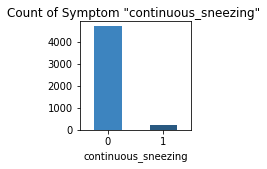

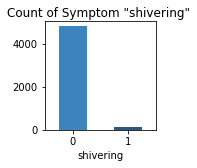

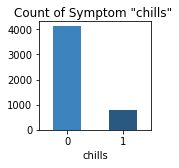

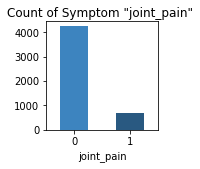

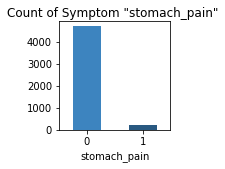

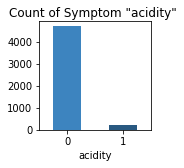

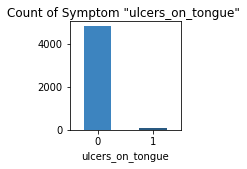

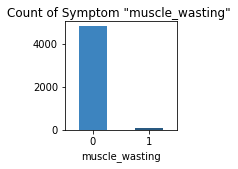

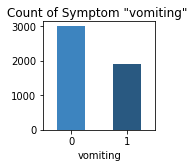

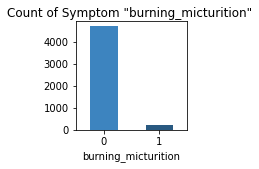

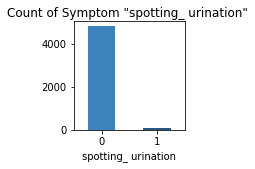

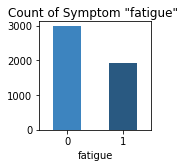

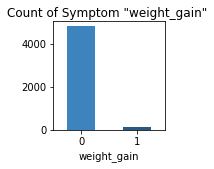

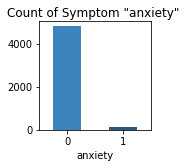

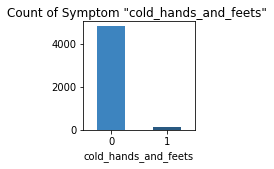

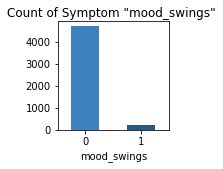

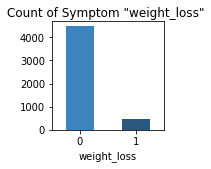

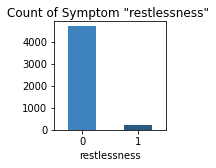

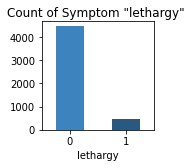

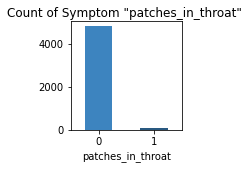

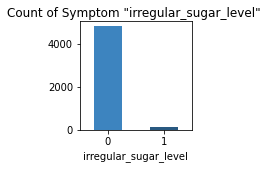

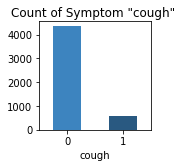

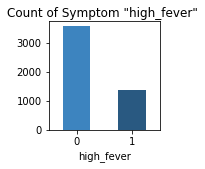

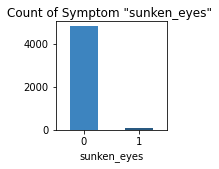

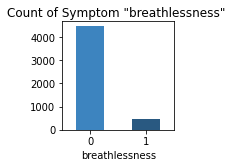

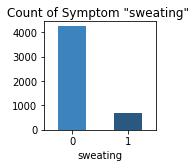

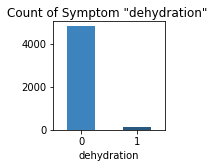

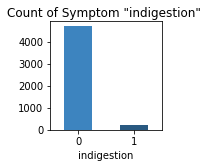

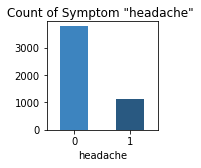

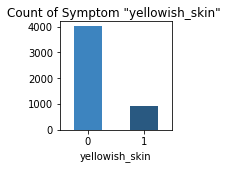

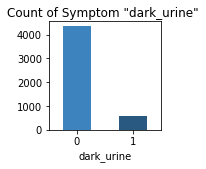

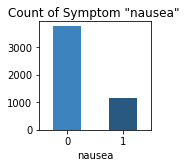

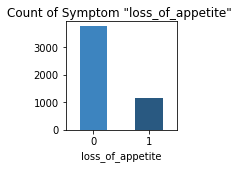

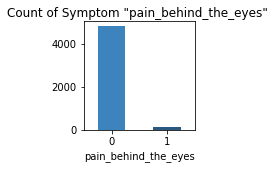

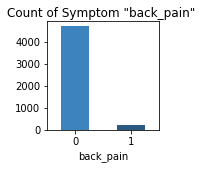

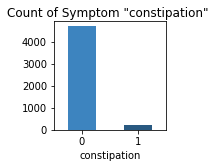

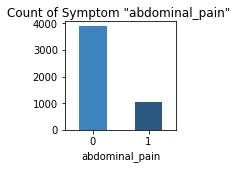

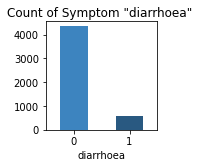

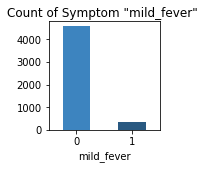

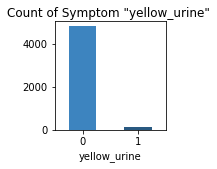

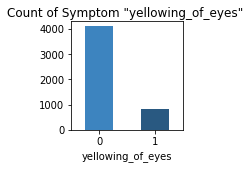

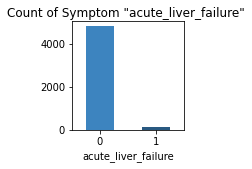

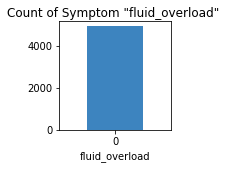

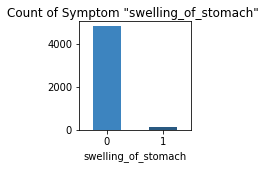

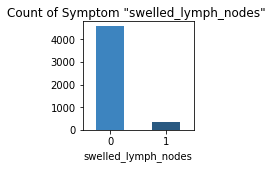

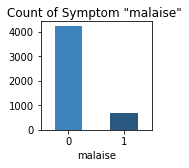

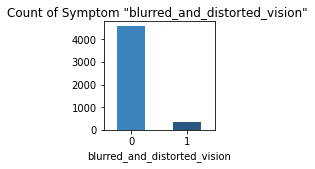

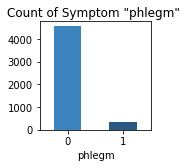

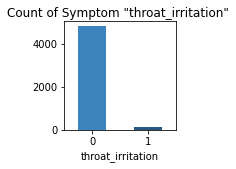

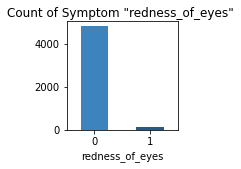

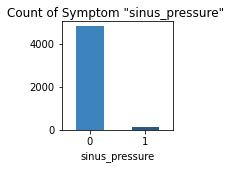

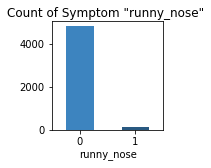

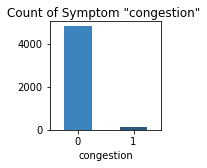

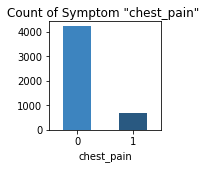

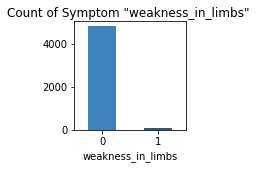

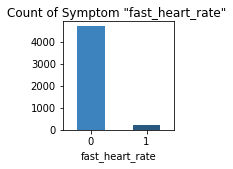

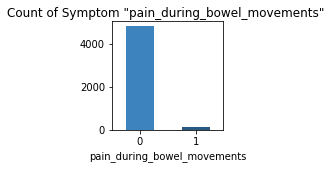

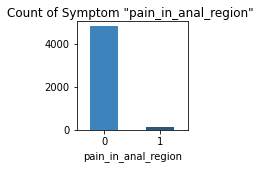

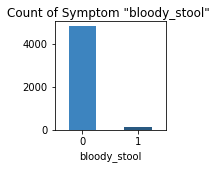

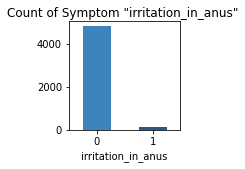

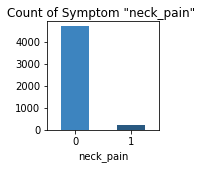

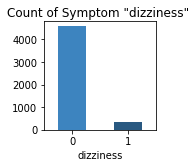

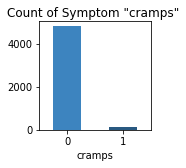

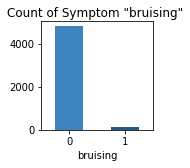

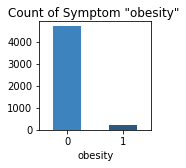

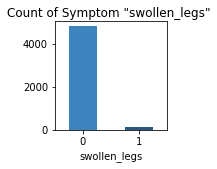

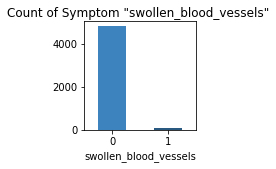

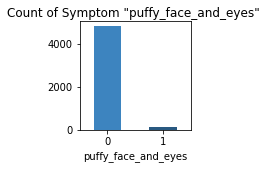

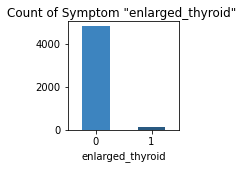

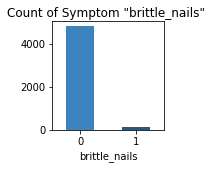

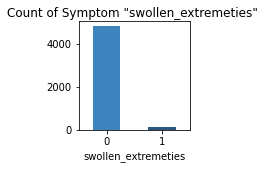

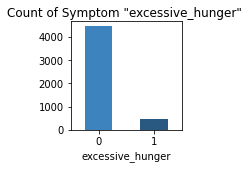

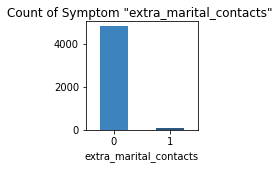

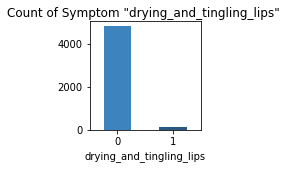

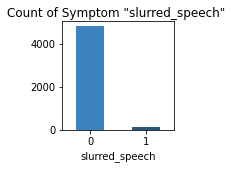

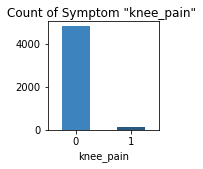

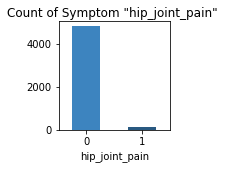

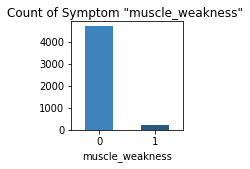

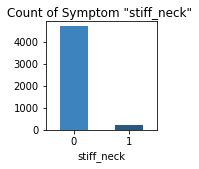

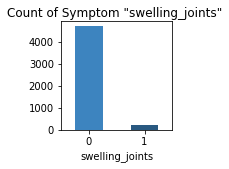

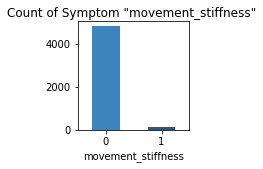

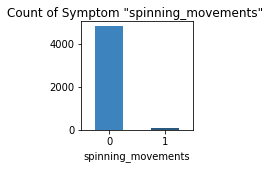

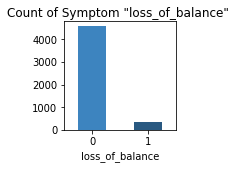

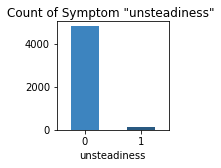

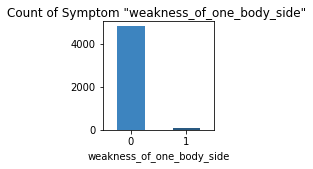

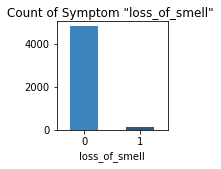

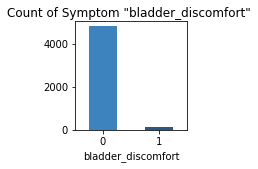

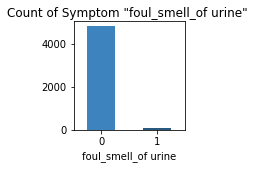

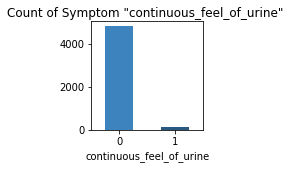

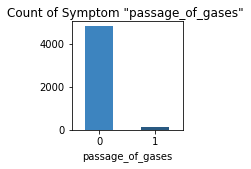

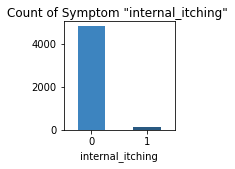

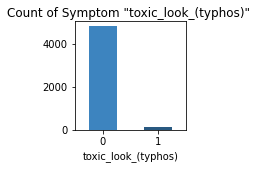

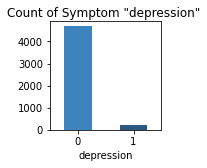

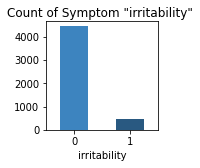

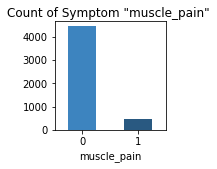

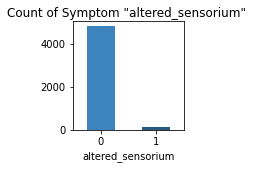

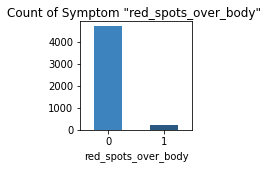

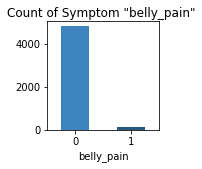

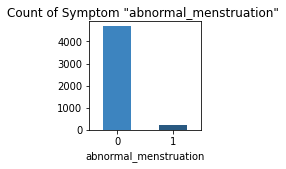

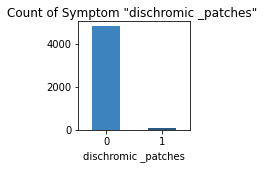

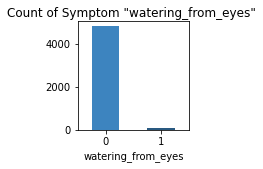

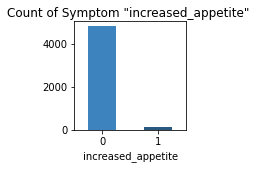

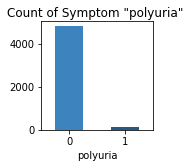

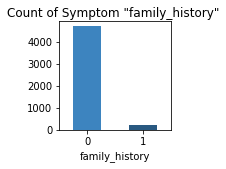

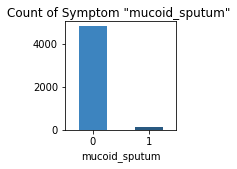

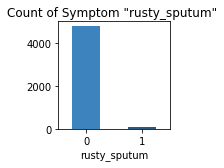

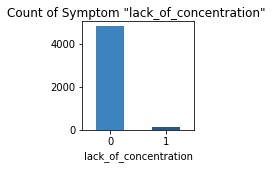

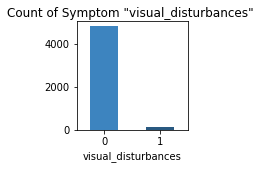

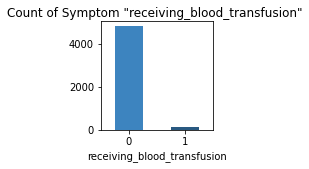

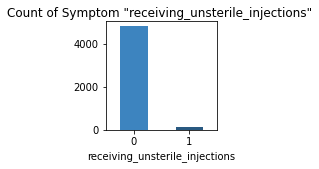

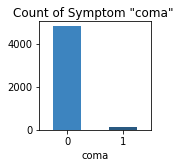

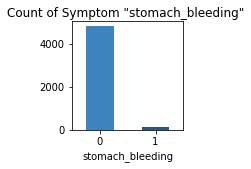

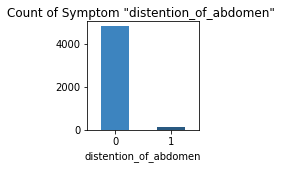

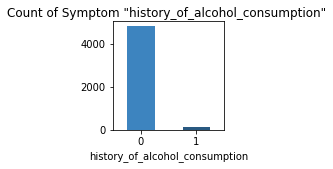

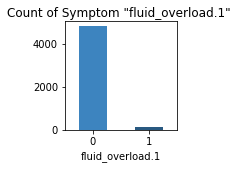

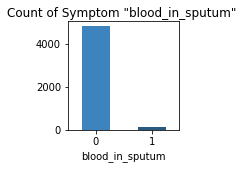

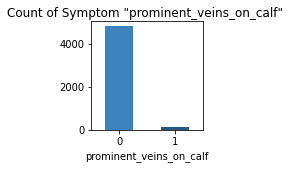

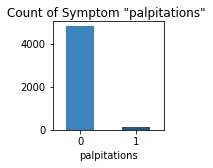

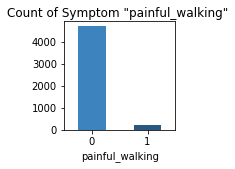

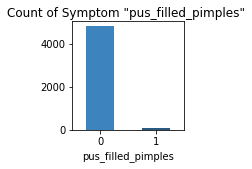

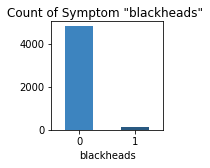

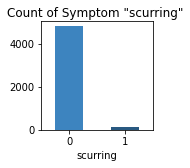

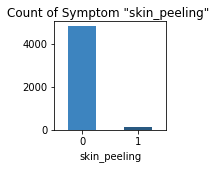

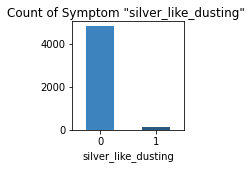

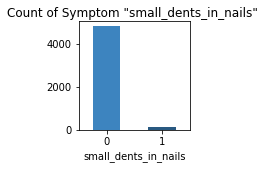

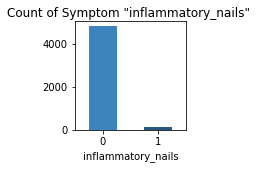

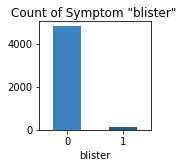

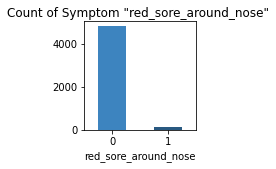

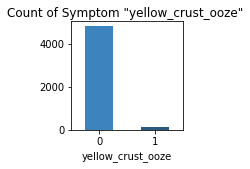

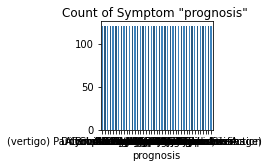

In [22]:
colors = ['#3d84bf', '#295981']
# barplot of the count for all symptoms' absence and presence
for i in columns :
    fig, ax = plt.subplots(figsize=(2,2))
    bar = dftrain.groupby(i).size().plot(kind='bar', color=colors, ax=ax)
    plt.xticks(rotation=0)
    fig.suptitle("Count of Symptom \"" + i + "\"")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


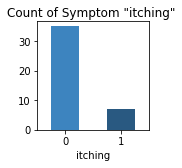

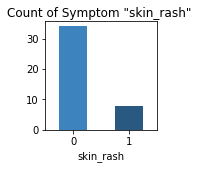

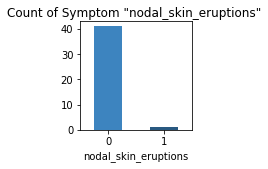

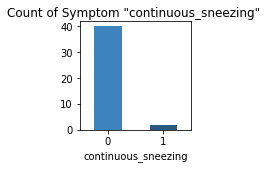

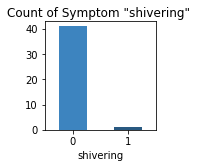

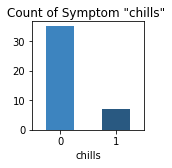

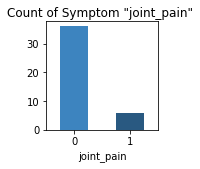

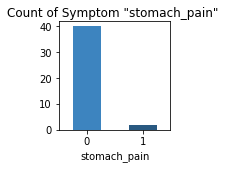

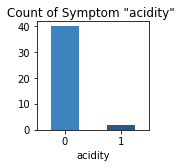

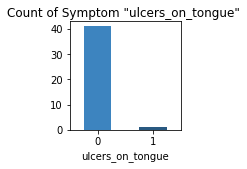

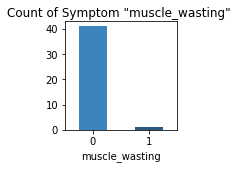

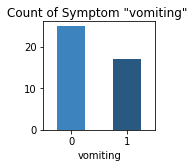

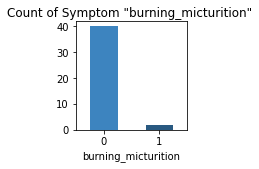

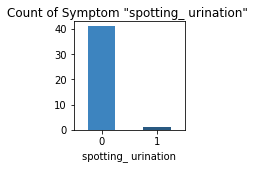

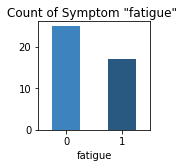

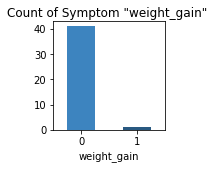

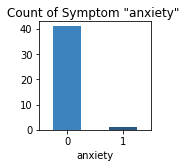

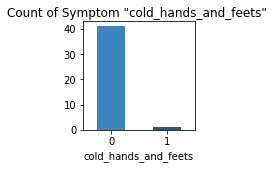

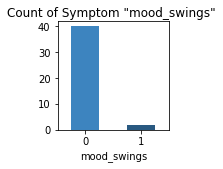

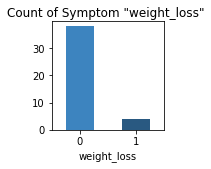

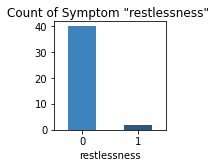

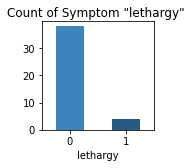

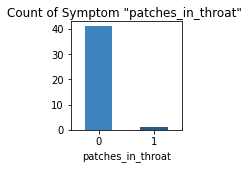

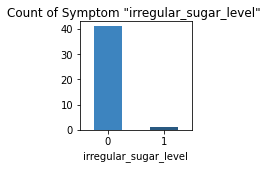

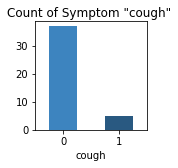

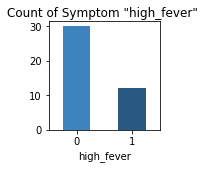

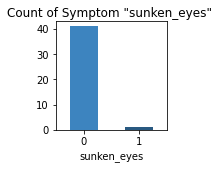

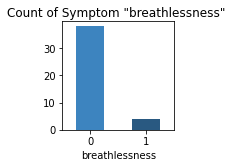

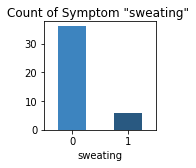

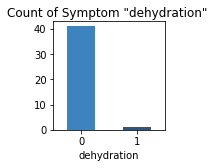

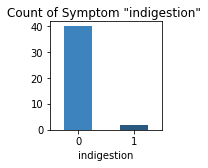

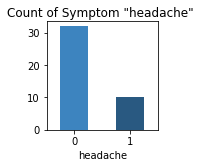

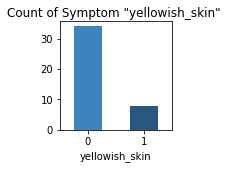

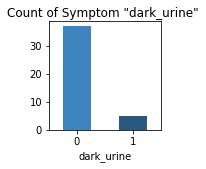

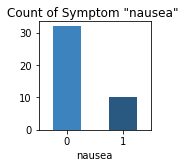

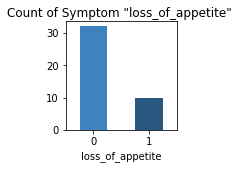

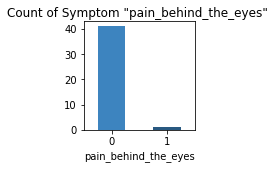

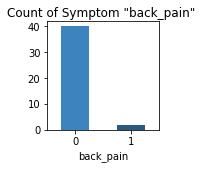

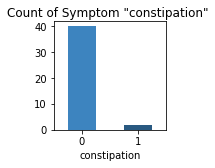

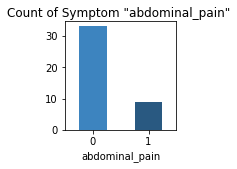

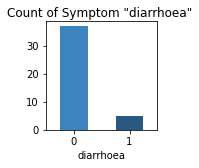

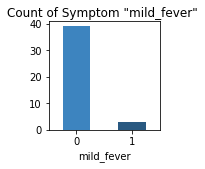

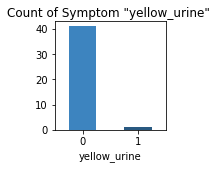

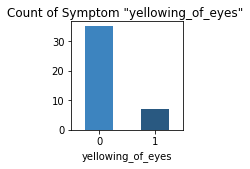

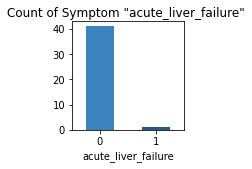

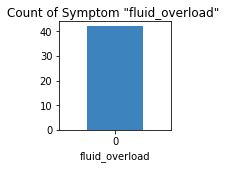

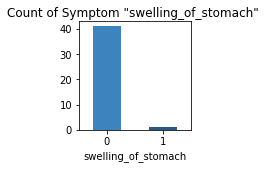

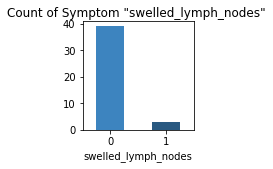

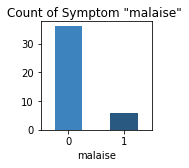

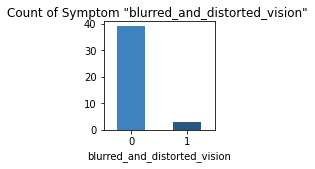

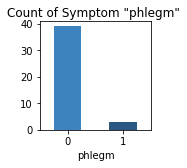

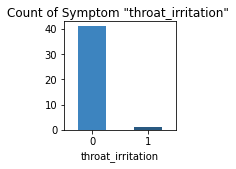

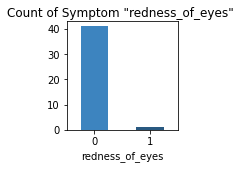

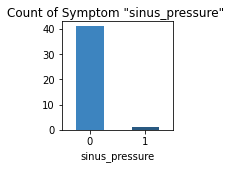

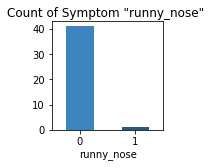

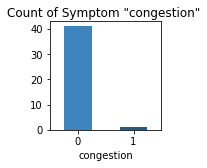

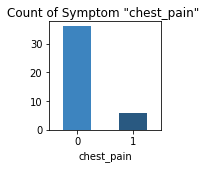

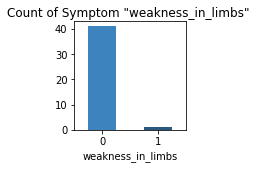

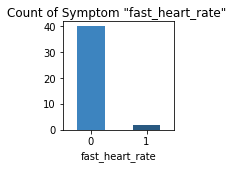

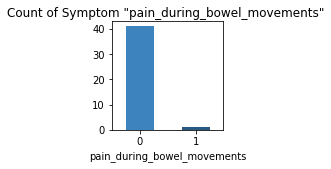

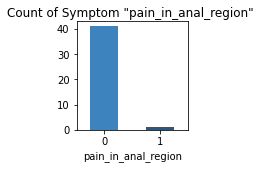

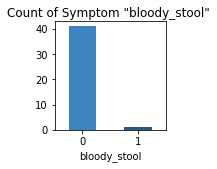

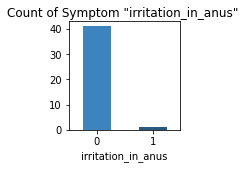

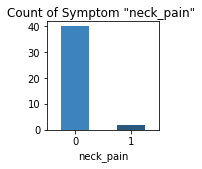

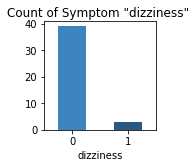

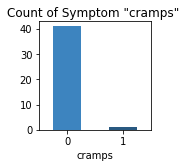

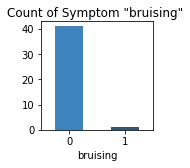

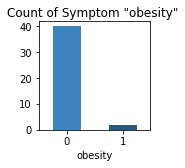

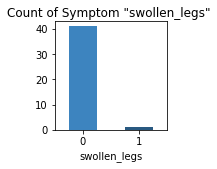

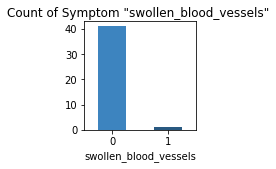

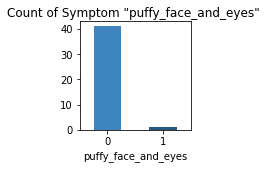

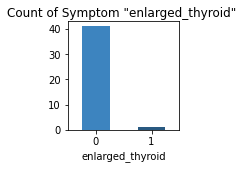

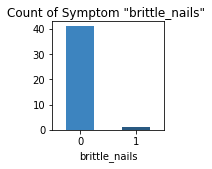

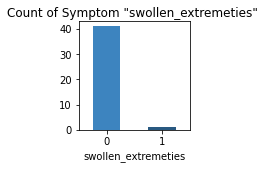

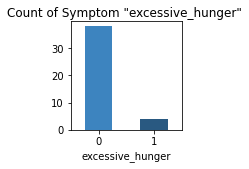

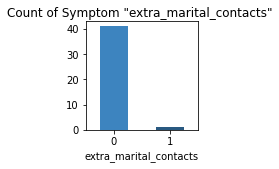

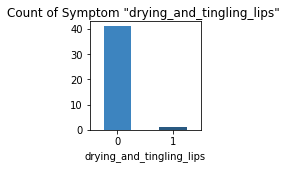

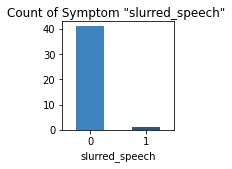

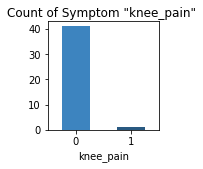

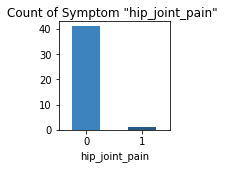

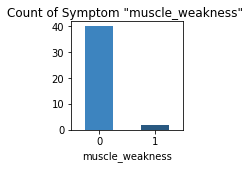

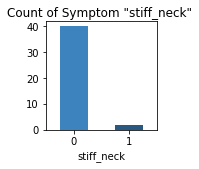

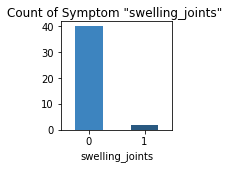

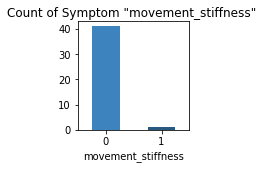

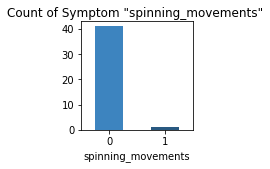

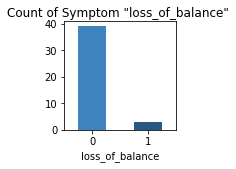

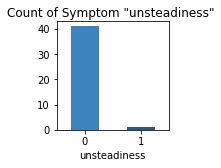

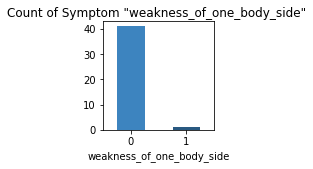

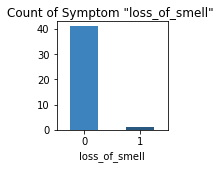

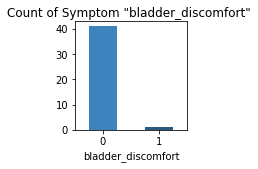

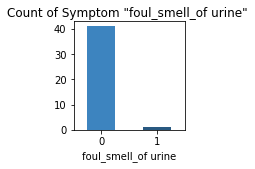

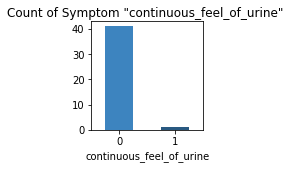

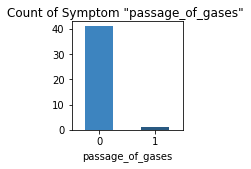

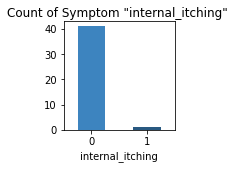

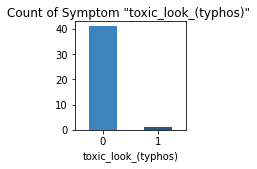

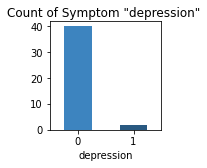

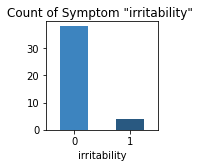

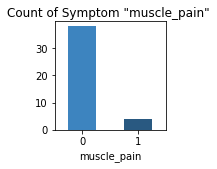

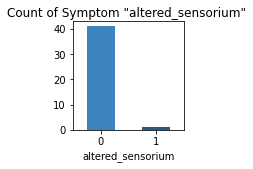

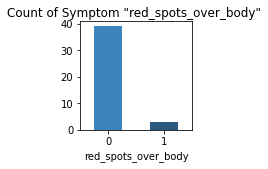

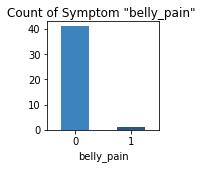

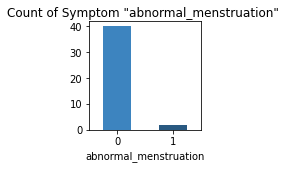

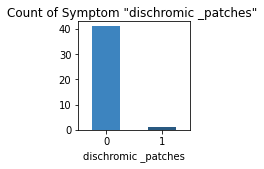

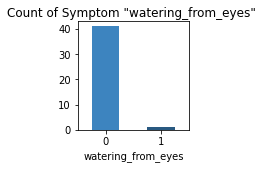

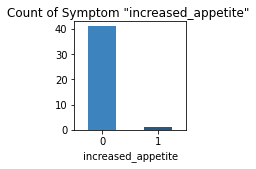

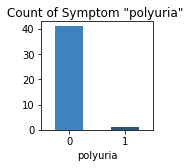

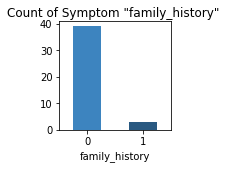

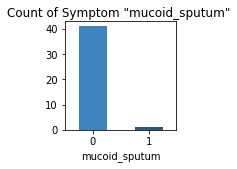

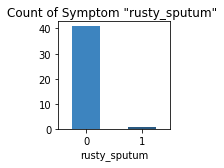

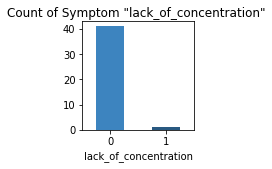

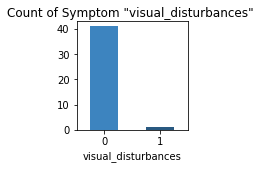

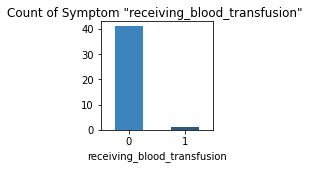

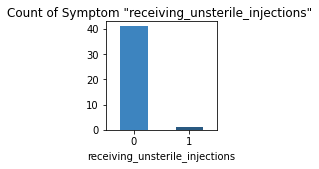

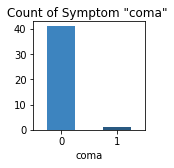

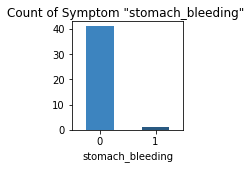

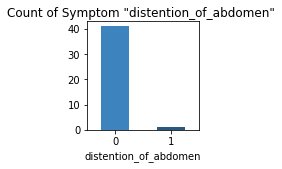

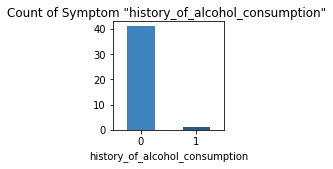

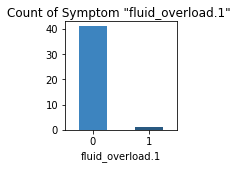

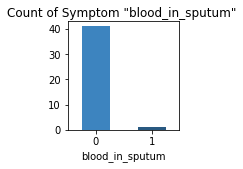

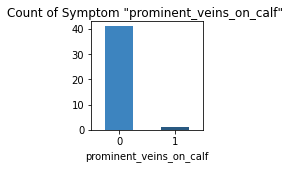

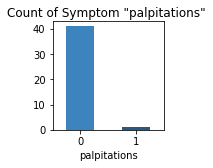

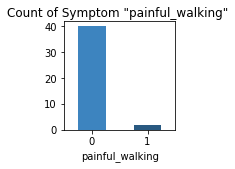

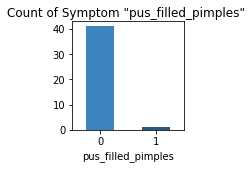

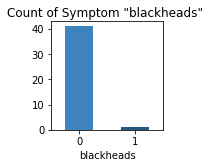

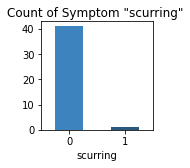

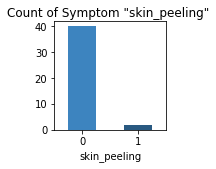

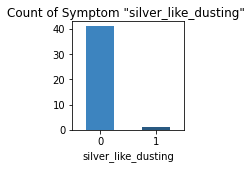

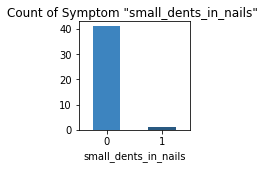

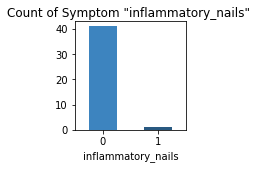

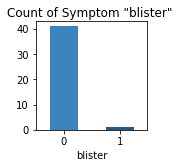

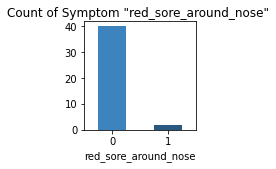

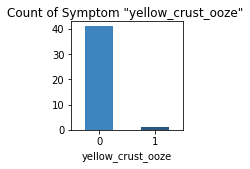

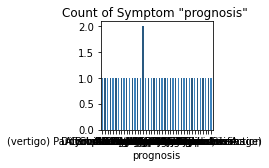

In [23]:
colors = ['#3d84bf', '#295981']
# barplot of the count for all symptoms' absence and presence
for i in columns :
    fig, ax = plt.subplots(figsize=(2,2))
    bar = dftest.groupby(i).size().plot(kind='bar', color=colors, ax=ax)
    plt.xticks(rotation=0)
    fig.suptitle("Count of Symptom \"" + i + "\"")

All occurences of symptoms are mostly absent, which is expected for a Disease Prognosis case study.

For these quantitative binary attributes of symptoms, their linear relationships and their strengths can be compared using a correlation heatmap.

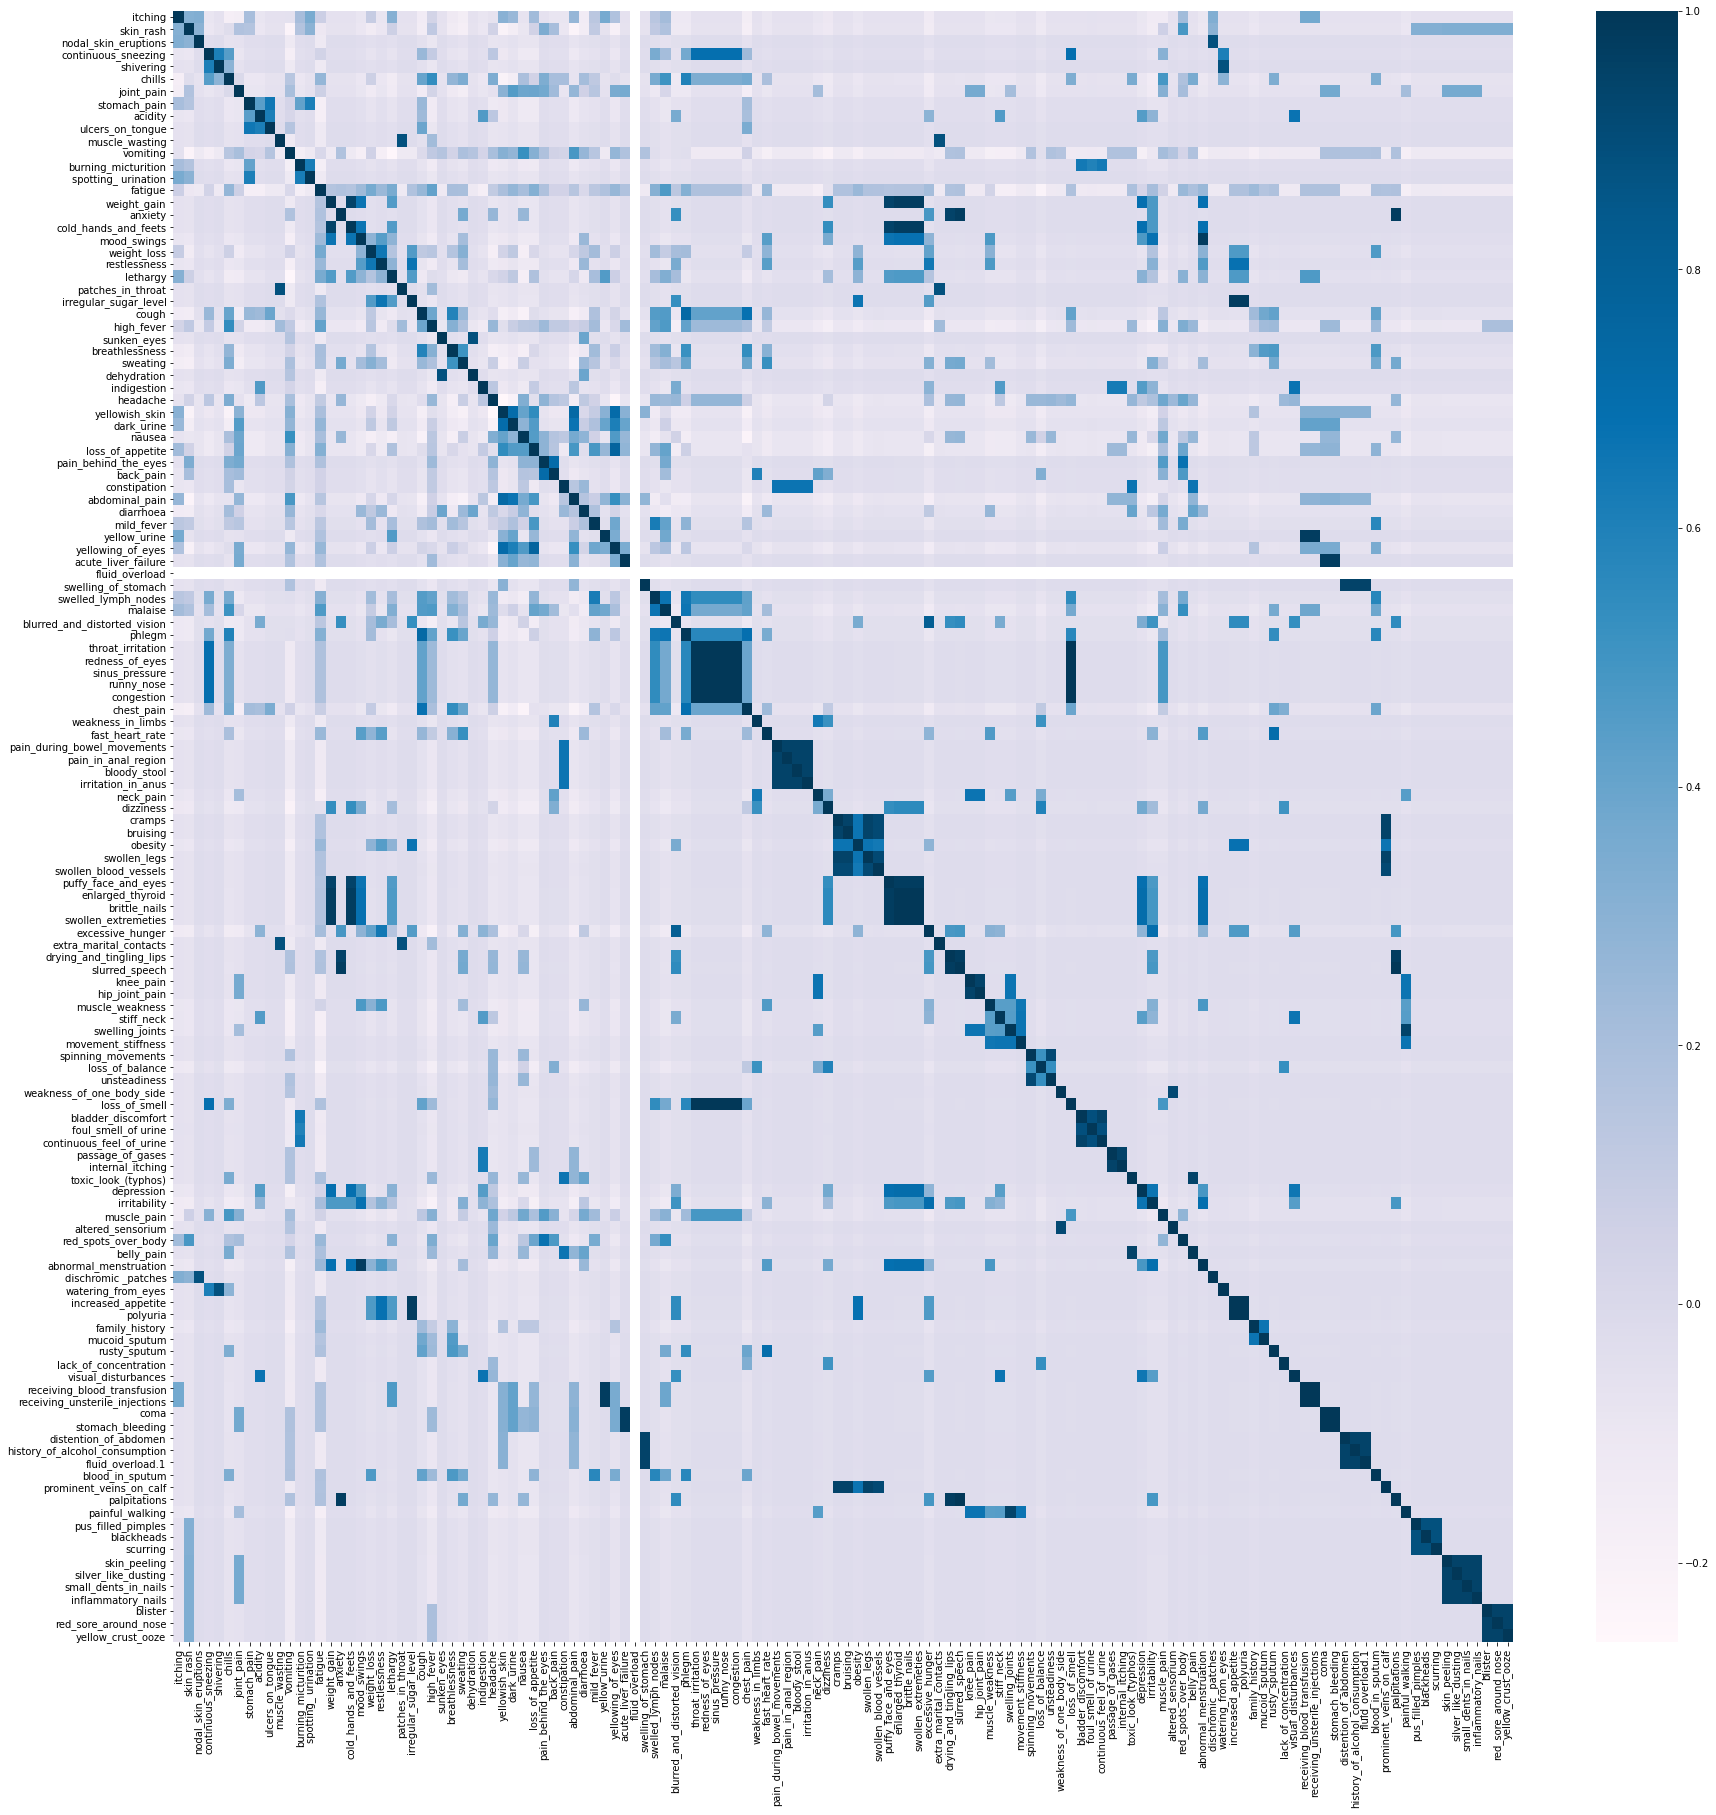

In [24]:
# compare linear relationships between attributes using correlation coefficient generated using correlation heatmap
plt.figure(figsize = (30, 30))
sns.heatmap(dftrain.corr(), cmap = 'PuBu', annot = False)
plt.show()

Almost all symptoms have weak linear correlations, which is indicative that these symptoms do not come hand-in-hand. 

Lastly, the summary statistics will be considered.

In [25]:
# summary statistics of the attributes, including measures of central tendency and measures of dispersion
dftrain.describe() 

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
# summary statistics of the attributes, including measures of central tendency and measures of dispersion
dftest.describe() 

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,...,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.166667,0.190476,0.023810,0.047619,0.023810,0.166667,0.142857,0.047619,0.047619,0.023810,...,0.023810,0.023810,0.023810,0.047619,0.023810,0.023810,0.023810,0.023810,0.047619,0.023810
std,0.377195,0.397437,0.154303,0.215540,0.154303,0.377195,0.354169,0.215540,0.215540,0.154303,...,0.154303,0.154303,0.154303,0.215540,0.154303,0.154303,0.154303,0.154303,0.215540,0.154303
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In summary, the datasets contain records for 132 predictors or independent or explanatory attributes, and an attribute for class label. The predictors all have discrete binary data values and no missing data values. 

describe() is used to obtain summary statistics including measures of central tendency such as mean and median, and measures of dispersion such as standard deviation, which are useful in providing a quick and simple description of the dataset and its characteristics. 

# Data Modelling

The two datasets represent the split into two separate sets - the training set and test set. They both consist of the same attributes, but not the same attribute values. The training set is used to train and construct the classification models. The test set is used to predict the classifications of the new unbiased data that were not used to train the model, before evaluating the model performance based on the performance metrics of accuracy, precision, recall, and F1-score of those classifications. 

The target class labels for both datasets have almost even distribution. It is assumed that the training and test sets are unbiased and representative of the target classes, such as already going through the process of using a list of random numbers starting from the random selected position to perform random splitting. The training subset takes up 4920 instances, whereas the test subset takes up 42 instances.

The machine Learning algorithms of Multilayer Perceptron (MLP) Neural Network, Decision Tree (DT), and Random Forest (RF), are chosen to fit to the dataset.

For the Multilayer Perceptron (MLP) Neural Network model, patterns of information are fed into the model via the input units, and these trigger the multiple layers of hidden units to ultimately arrive at the output units. The output is the computed values for the output-layer nodes.

Decision tree is constructed based on parameters of best split strategy, and the criterion of entropy which utilises information gain to iteratively select the next node according to higher feature importance to optimise the quality of splits. The minimum number of leaves are restricted to 2. The outputs are the classification rules as extracted from the decision tree. These are determined by the flow sequence from the root node and the corresponding branches to the internal or decision nodes, then stopping when the leaf node representing the class label is reached. 

Random Forest classifier will combine multiple base models of Decision Trees during its training period, using the strategy of ensemble machine learning methods. This will construct a single optimal predictive model, with the criterion of entropy which utilises information gain to iteratively select the next node according to higher feature importance to optimise the quality of splits. The minimum number of leaves are restricted to 2. The final output may be the mode class or the mean prediction of individual trees.

In [27]:
# classify and model the data using Multilayer Perceptron (MLP) Neural Network, Decision Tree (DT), and Random Forest (RF)
    # machine learning algorithms

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import math

# split dataset into attributes and labels
X_train = dftrain.iloc[:, :-1].values # the training attributes
y_train = dftrain.iloc[:, 132].values # the training labels
X_test = dftest.iloc[:, :-1].values # the testing attributes
y_test = dftest.iloc[:, 132].values # the testing labels

In [28]:
# using DT based on information gain
classifierDT = DecisionTreeClassifier(splitter='best', criterion='entropy', min_samples_leaf=2)
classifierDT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2)

In [29]:
# using RF classifier
classifierRF = RandomForestClassifier(criterion='entropy', min_samples_leaf=2)
classifierRF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=2)

In [30]:
# using MLP classifier
classifierMLP = MLPClassifier()
classifierMLP.fit(X_train, y_train)

MLPClassifier()

# Model Evaluation

The model performance is evaluated and validated by using the test set of 42 records to predict the classifications of these new unbiased data that were not used to train the model. The confusion matrix is then used to determine the performance metrics of accuracy, precision, recall, and F1-score, based on those classifications. The supports are 1 instance for each target class label of prognosis. This process ensures that the models are useful by being generalisable even when the specific training data used is extended to include new test data, or in technical terms ‘avoid over fitting’.

In [31]:
# use the chosen three models to make predictions on test data
y_predMLP = classifierMLP.predict(X_test)
y_predDT = classifierDT.predict(X_test)
y_predRF = classifierRF.predict(X_test)

In [32]:
# for MLP model
# using confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predMLP))
print(classification_report(y_test, y_predMLP))

# using accuracy performance metric
from sklearn.metrics import accuracy_score
print("Train Accuracy: ", accuracy_score(y_train, classifierMLP.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predMLP))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

In [33]:
# for RF model
# using confusion matrix
print(confusion_matrix(y_test, y_predRF))
print(classification_report(y_test, y_predRF))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierRF.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predRF))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

In [34]:
# for DT model
# using confusion matrix
print(confusion_matrix(y_test, y_predDT))
print(classification_report(y_test, y_predDT))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierDT.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predDT))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

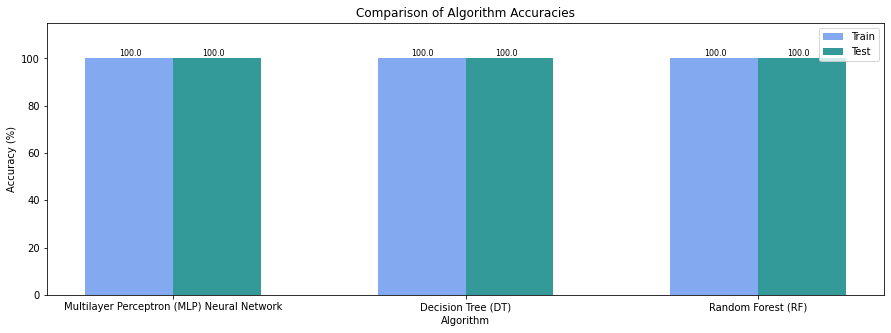

In [35]:
# data to plot
n_groups = 3
algorithms = ('Multilayer Perceptron (MLP) Neural Network', 'Decision Tree (DT)', 'Random Forest (RF)')
train_accuracy = (accuracy_score(y_train, classifierMLP.predict(X_train))*100, 
                  accuracy_score(y_train, classifierDT.predict(X_train))*100, 
                  accuracy_score(y_train, classifierRF.predict(X_train))*100)
test_accuracy = (accuracy_score(y_test, y_predMLP)*100, 
                 accuracy_score(y_test, y_predDT)*100, 
                 accuracy_score(y_test, y_predRF)*100)

# create plot
fig, ax = plt.subplots(figsize=(15, 5))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
rects1 = plt.bar(index, train_accuracy, bar_width, alpha = opacity, color='Cornflowerblue', label='Train')
rects2 = plt.bar(index + bar_width, test_accuracy, bar_width, alpha = opacity, color='Teal', label='Test')
plt.xlabel('Algorithm') # x axis label
plt.ylabel('Accuracy (%)') # y axis label
plt.ylim(0, 115)
plt.title('Comparison of Algorithm Accuracies') # plot title
plt.xticks(index + bar_width * 0.5, algorithms) # x axis data labels
plt.legend(loc = 'upper right') # show legend
for index, data in enumerate(train_accuracy):
    plt.text(x = index - 0.035, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(test_accuracy):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
plt.show()

DT model has the best performance metrics of 100% for all four metrics of test accuracy, precision, recall, and F1-score. The RF model also achieved 100% for all, but this is not preferred as the time complexity will usually be larger. On the other hand, the MLP model have the precision of 99%, and 98% for all three of accuracy, recall, and F1-score. For all three chosen models, all the prognosis are almost perfectly classified and predicted. 

Although there are only small differences between the train and test accuracy and thus no overfitting in this sense, the 100% train accuracy still indicates that the learnt rules are specific for the train set and do not generalize well beyond the train set to the test set. This will be taken care of later on, when the best model is chosen.

Accuracy indicates the overall proportion of correct predictions for all the three classes. The train accuracy is measured based on examples that the model was constructed on, while the test accuracy is based on those it has yet to see. DT achieved 100% for both train accuracy and test accuracy. 

However, it will be misleading to solely base decisions on this, as the dataset used is relatively small and biased. Recall and precision metrics are thus also considered to measure model performance. 

Recall indicates the proportion of correct predictions for each individual class, out of the corresponding actual class. In other words, the proportion of all actual classes that were predicted correctly. It was found that 100% of all actual classes were predicted correctly by DT. 

Precision indicates the proportion of correct predictions for each individual class, out of the corresponding predicted class. In other words, the proportion of all predicted classes were actually predicted correctly. It was found that 100% of all predicted classes were actually predicted correctly by DT.

However, recall and precision have an inverse relationship. In order to make them comparable for cases where they are both important, F1 score is introduced. F1-score, also known as F-score or F-measure, is used to make precision and recall comparable in cases where they are both important, by measuring their harmonic mean. This allows it to consider both metrics and punish extreme values more heavily. Therefore, F-score will compute the overall quality of translations produced by the chosen machine learning engine, which is 100% by the DT model.

The confusion matrix tabulates the predicted class vertically and the actual class horizontally.

In conclusion, the DT model using the parameter of best split, the criterion of entropy, and the minimum number of 2 leaves, is chosen as the best model for the prediction of disease prognosis.

# Model Interpretation 

The final crucial step of a data science project is the interpretation of the models and data, in terms of its predictive power and thus its ability to generalise unseen future data.

Feature engineering will involve feature selection based on higher feature importance towards the chosen model. This yields a subset of features from the original set to better represent the data, thus enabling the machine learning algorithm to train faster and reducing the model's computational complexity and cost. The model can also be easier to interpret and become more comprehendible to humans, and in some cases achive improved accuracy when the right subset is chosen. 

The feature importance of each symptom is identified and fully listed below.

In [36]:
# identify the important features in DT
imp = classifierDT.feature_importances_
imp

array([0.03054722, 0.05508944, 0.00125416, 0.00147734, 0.        ,
       0.02372591, 0.01023205, 0.00336783, 0.        , 0.        ,
       0.00088777, 0.10027535, 0.        , 0.00563969, 0.15787755,
       0.        , 0.        , 0.        , 0.        , 0.0029918 ,
       0.        , 0.        , 0.        , 0.        , 0.01045951,
       0.05587574, 0.        , 0.        , 0.00164917, 0.00153758,
       0.        , 0.03259118, 0.00942588, 0.00128653, 0.03763473,
       0.06604646, 0.        , 0.0081945 , 0.00082164, 0.03112966,
       0.01170182, 0.        , 0.00045525, 0.02870473, 0.        ,
       0.        , 0.00128653, 0.0024979 , 0.02897643, 0.00045525,
       0.        , 0.        , 0.        , 0.00045525, 0.00045525,
       0.        , 0.03930487, 0.00062708, 0.00062708, 0.        ,
       0.0136102 , 0.        , 0.        , 0.0046478 , 0.01874675,
       0.        , 0.        , 0.00164329, 0.00398362, 0.        ,
       0.        , 0.        , 0.        , 0.00110506, 0.00045

In [37]:
# combine list of symptoms and their feature importance into a 2D array
columns = columns[:132]
column_names = ['symptom', 'importance']
df3 = np.vstack((columns, imp)).T
df3 = pd.DataFrame(df3, columns = column_names)
df3

,symptom,importance
0,itching,0.030547217017609735
1,skin_rash,0.05508944010003132
2,nodal_skin_eruptions,0.0012541619389532716
3,continuous_sneezing,0.0014773367621044376
4,shivering,0.0
...,...,...
127,small_dents_in_nails,0.0
128,inflammatory_nails,0.0
129,blister,0.010749695051767143
130,red_sore_around_nose,0.0006270809694766358


Taking all of these into consideration, a minimum threshold for feature importance is set in order to identify features of low importance, and thus can be excluded from the final predictive model.

In [38]:
coefficients = classifierDT.feature_importances_

# set a minimum threshold for feature importance
importance_threshold = np.quantile(coefficients, q = 0.75)
import plotly.express as px

# barplot of feature importance
fig = px.bar(x = coefficients, y = columns, orientation = 'h', color = coefficients, 
             color_continuous_scale = [(0, '#b7d2e8'), (1, '#295981')], labels = {'x': "Importance Value", 'y': "Feature"}, 
             title = "Feature Importance For Decision Tree Model")

# cut off value as the minimum threshold for feature importance
fig.add_vline(x = importance_threshold, line_color = 'red', line_width = 0.8)
fig.add_vrect(x0 = importance_threshold, x1 = 0, line_width = 0, fillcolor = 'red', opacity = 0.2)
fig.show()

The symptom of 'fatique' is found to have the significantly largest predictive power of 0.1579, out of all the 132 predictors.

On the other hand, the low importance features are identified below.

In [39]:
import numpy
# identify features with feature importance values below the minimum threshold
low_importance_features = numpy.array(df3.symptom[np.abs(coefficients) <= importance_threshold])
columns = list(low_importance_features)
columns

['nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'burning_micturition',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'dark_urine',
 'pain_behind_the_eyes',
 'constipation',
 'mild_fever',
 'yellow_urine',
 'acute_liver_failure',
 'fluid_overload',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'weakness_in_limbs',
 'fast_heart_rate',
 'pain_during_bowel_movements',
 'bloody_stool',
 'irritation_in_anus',
 'neck_pain',
 'cramps',
 'bruising',
 'obesity',
 'swollen_legs',
 'swollen_blood_vessels',
 'puffy_face_and_eyes',
 'enlarged_thyroid',
 'brittle_nails',
 'swollen_extrem

These low importance features are dropped.

In [40]:
for i in columns :
    # drop low importance features
    dftrain.drop(i, axis=1, inplace=True)
    dftest.drop(i, axis=1, inplace=True)
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   itching                         4920 non-null   int64 
 1   skin_rash                       4920 non-null   int64 
 2   chills                          4920 non-null   int64 
 3   joint_pain                      4920 non-null   int64 
 4   vomiting                        4920 non-null   int64 
 5   spotting_ urination             4920 non-null   int64 
 6   fatigue                         4920 non-null   int64 
 7   cough                           4920 non-null   int64 
 8   high_fever                      4920 non-null   int64 
 9   headache                        4920 non-null   int64 
 10  yellowish_skin                  4920 non-null   int64 
 11  nausea                          4920 non-null   int64 
 12  loss_of_appetite                4920 non-null   

In [41]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   itching                         42 non-null     int64 
 1   skin_rash                       42 non-null     int64 
 2   chills                          42 non-null     int64 
 3   joint_pain                      42 non-null     int64 
 4   vomiting                        42 non-null     int64 
 5   spotting_ urination             42 non-null     int64 
 6   fatigue                         42 non-null     int64 
 7   cough                           42 non-null     int64 
 8   high_fever                      42 non-null     int64 
 9   headache                        42 non-null     int64 
 10  yellowish_skin                  42 non-null     int64 
 11  nausea                          42 non-null     int64 
 12  loss_of_appetite                42 non-null     int6

The final datasets contains 33 columns of predictors, out of the original 132. These are fed into the DT model with the parameter of best split, the criterion of entropy, and the minimum number of 2 leaves. The performance metrics of test accuracy, precision, recall, and F1-score are measured again for this new model. 

In [42]:
# split dataset into attributes and labels
X_train = dftrain.iloc[:, :-1].values # the training attributes
y_train = dftrain.iloc[:, 33].values # the training labels
X_test = dftest.iloc[:, :-1].values # the testing attributes
y_test = dftest.iloc[:, 33].values # the testing labels

# using DT based on information gain
classifierDT = DecisionTreeClassifier(splitter='best', criterion='entropy', min_samples_leaf=2)
classifierDT.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2)

In [43]:
# for DT model
y_predDT = classifierDT.predict(X_test)

# using confusion matrix
print(confusion_matrix(y_test, y_predDT))
print(classification_report(y_test, y_predDT))

# using accuracy performance metric
print("Train Accuracy: ", accuracy_score(y_train, classifierDT.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_predDT))

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       1.00      1.00      1.00         1
                    Chronic cholestasis       1.00      1.00      1.0

DT model has an improved performance metrics of 95% test accuracy and recall, and 94% precision and F1-score. Thus, all the prognosis are almost perfectly classified and predicted, and the small difference of 0.8% between the train and test accuracy indicates this DT model suffers from neither overfitting nor underfitting. 

In conclusion, the DT model using the parameter of best split, the criterion of entropy, and the minimum number of 2 leaves, is chosen as the final model for the prediction of disease prognosis using 33 predictors of symptoms.

The DT model is now ready to be deployed to predict new value instances. To do so, a data frame is created to describe the characteristics of a number of disease cases based on the symptoms. These new data instances will be passed to the DT model classifier to predict its target class label of disease prognosis. 

In [44]:
# new data on 33 attributes
newdata = [[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 
            0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1]]

# compute probabilities of assigning to each of the classes of prognosis
probaDT = classifierDT.predict_proba(newdata)
probaDT.round(4) # round probabilities to four decimal places, if applicable

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [45]:
# make prediction of target class label
predDT = classifierDT.predict(newdata)
predDT

array(['Gastroenteritis'], dtype=object)

The predicted class for the specified example is assigned as "Gastroenteritis", as its probability is the highest among that for the other classes of diseases. It is also safe to intepret this result as having 95% accuracy and recall, and 94% precision and F1-score, based on the DT model's performance metrics. 

Possible improvements can be to include other strong predictors of disease prognosis, such as other symptoms outside of the aforementioned 132. These predictors can be very relevant and thus useful to include in the model design.

# Thank you !